# EDA Case Study : Loan Default Analysis 

# Introduction to the Case Study 

In this case study, we will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default. This analysis will help consumer finance company to ensure that the applicants capable of repaying the loan are not rejected

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
 <br>  1: If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 <br>  2: If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 
 <br>The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
 <br>1.The <b>client with payment difficulties</b>: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample
 <br>2.All <b>other cases</b>: All other cases when the payment is paid on time
  
 <br>When a client applies for a loan, there are four types of decisions that could be taken by the client/company:
 <br><b>1. Approved</b>: The Company has approved loan Application
 <br><b>2. Cancelled</b>: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
 <br><b>3. Refused</b>: The company had rejected the loan (because the client does not meet their requirements etc.
 <br><b>4. Unused offer</b>: Loan has been cancelled by the client but on different stages of the process.


## OBJECTIVE :  To ensure that the applicants capable of repaying the loan are not rejected
<br> a) To identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. 
<br> b) To understand the  driver variables behind loan default, i.e. the variables which are strong indicators of default. 

# Exploratory Data Analysis (EDA) into below sections

## **1. Data Sourcing**
>`Loading Data into dataframe`<br>
>`Reading and understanding the data`

## **2. Data Cleaning**
>`Null Value Suggestion`<br>
> a. Deleting and Dropping Columns with null percenatge is high % <br><br>
>`Deleting duplicate values`<br><br>
>`Analyize Columns Descriptions`<br>
> a. Remove unnecessary columns <br>
> b. Remove rows where values are 25% empty <br><br>
> `Data Type Check for coloumns`<br>
> a. Standardize the data types <br>
> b. Filling appropriate values for NAN <br>
> c. Standardize the data types <br>
> d. Finding outliers <br>
> e. Dealing with error/unknown values <br><br>

## **3. Univariate Analysis**
>`Categorical Variable`<br>
>`Correaltion between contineous Variable`<br>
>`Contineous Variable`<br>

## **4. Bivariate/Multivariate Analysis**
>`Contineous vs Contineous Variable`<br>
>`Contineous vs Categorical Variable`<br>
>`Categorical vs Categorical Variable`<br>

## **5. Merged Dataframe Analysis**
>`Graphs and Insights`<br>

## **6. Insights**





## 1. Data Sourcing

### Loading Data into dataframe

In [4]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print("Python: {}".format(sys.version))
print("Numpy: {}".format(numpy.__version__))
print("Pandas: {}".format(pandas.__version__))
print("MatplotLib: {}".format(matplotlib.__version__))
print("Seaborn: {}".format(seaborn.__version__))
print("Scipy: {}".format(scipy.__version__))

import numpy as np                        # for scientific computing 
import pandas as pd                       # to perform data manipulation  - data cleaning and analysis
import matplotlib.pyplot as plt           # for data visualisation and graphical plotting
%matplotlib inline 
import seaborn as sns                     # for making statictical graphics 
import warnings                           # to supress warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',300)  # to display all columns 
pd.set_option('display.max_rows',300)     # to display all rows
pd.set_option('display.width',1000) 
# To supress scientific notations in Pandas 
pd.set_option('display.float_format', lambda x : '%.2f' % x)   # changes behavior globally in Jupyter Notebooks 


appl_dat = pd.read_csv('application_data.csv')
prev_appl = pd.read_csv('previous_application.csv')

Python: 3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.22.4
Pandas: 1.4.2
MatplotLib: 3.5.2
Seaborn: 0.11.2
Scipy: 1.8.1


### Reading and understanding the data 

In [5]:
appl_dat.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0         202500.00   406597.50     24700.50        351000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                        0.02       -9461           -637           -3648.00            -2120          NaN           1               1                0                 1           1           0        Laborers             1.00                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.08          0.26          0.14            0.02              0.04                         0.97             0.62            0.01           0.00           0.07           0.08           0.12          0.04   
1      100003       0         Cash loans           F            N               N             0         270000.00  1293502.50     35698.50       1129500.00          Family    State servant               Higher education               Married  House / apartment                        0.00      -16765          -1188           -1186.00             -291          NaN           1               1                0                 1           1           0      Core staff             2.00                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School          0.31          0.62           NaN            0.10              0.05                         0.99             0.80            0.06           0.08           0.03           0.29           0.33          0.01   
2      100004       0    Revolving loans           M            Y               Y             0          67500.00   135000.00      6750.00        135000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                        0.01      -19046           -225           -4260.00            -2531        26.00           1               1                1                 1           1           0        Laborers             1.00                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN          0.56          0.73             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [6]:
prev_appl.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans      1730.43         17145.00    17145.00              0.00         17145.00                   SATURDAY                       15                           Y                       1               0.00                   0.18                      0.87                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity        12.00           middle  POS mobile with interest           365243.00          -42.00                     300.00         -42.00            -37.00                       0.00
1     2802425      108129         Cash loans     25188.62        607500.00   679671.00               NaN        607500.00                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA        36.00       low_action          Cash X-Sell: low           365243.00         -134.00                     916.00      365243.00         365243.00                       1.00
2     2523466      122040         Cash loans     15060.74        112500.00   136444.50               NaN        112500.00                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00             high         Cash X-Sell: high           365243.00         -271.00                      59.00      365243.00         365243.00                       1.00
3     2819243      176158         Cash loans     47041.33        450000.00   470790.00               NaN        450000.00                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00           middle       Cash X-Sell: middle           365243.00         -482.00                    -152.00        -182.00           -177.00                       1.00
4     1784265      202054         Cash loans     31924.40        337500.00   404055.00               NaN        337500.00                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [7]:
# Database dimensions
print('appl_dat:  ',appl_dat.shape)
print('prev_appl: ',prev_appl.shape)

appl_dat:   (307511, 122)
prev_appl:  (1670214, 37)


In [8]:
# View the statistic summary 
appl_dat.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
count   307511.00 307511.00     307511.00         307511.00   307511.00    307499.00        307233.00                   307511.00   307511.00      307511.00          307511.00        307511.00    104582.00   307511.00       307511.00        307511.00         307511.00   307511.00   307511.00        307509.00             307511.00                    307511.00                307511.00                   307511.00                   307511.00                    307511.00               307511.00               307511.00                307511.00     134133.00     306851.00     246546.00       151450.00         127568.00                    157504.00        103023.00        92646.00      143620.00      152683.00      154491.00       98869.00     124921.00              97312.00       153161.00                 93997.00          137829.00        151450.00          127568.00                     157504.00         103023.00         92646.00       143620.00       152683.00       154491.00   
mean    278180.52      0.08          0.42         168797.92   599026.00     27108.57        538396.21                        0.02   -16037.00       63815.05           -4986.12         -2994.20        12.06        1.00            0.82             0.20              1.00        0.28        0.06             2.15                  2.05                         2.03                    12.06                        0.02                        0.05                         0.04                    0.08                    0.23                     0.18          0.50          0.51          0.51            0.12              0.09                         0.98             0.75            0.04           0.08           0.15           0.23           0.23          0.07                  0.10            0.11                     0.01               0.03             0.11               0.09                          0.98              0.76             0.04            0.07            0.15            0.22   
std     102790.18      0.27          0.72         237123.15   402490.78     14493.74        369446.46                        0.01     4363.99      141275.77            3522.89          1509.45        11.94        0.00            0.38             0.40              0.04        0.45        0.23             0.91                  0.51                         0.50                     3.27                        0.12                        0.22                         0.20                    0.27                    0.42                     0.38          0.21          0.19          0.19            0.11              0.08                         0.06             0.11            0.08           0.13           0.10           0.14           0.16          0.08                  0.09            0.11                     0.05               0.07             0.11               0.08                          0.06              0.11             0.07            0.13            0.10            0.14   
min     100002.00      0.00          0.00      

In [9]:
# View the statistic summary 
prev_appl.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1670214.00  1670214.00   1297979.00       1670214.00  1670213.00         774370.00       1284699.00               1670214.00              1670214.00          774370.00                5951.00                   5951.00     1670214.00        1670214.00   1297984.00           997149.00       997149.00                  997149.00      997149.00         997149.00                  997149.00
mean   1923089.14   278357.17     15955.12        175233.86   196114.02           6697.40        227847.28                    12.48                    1.00               0.08                   0.19                      0.77        -880.68            313.95        16.05           342209.86        13826.27                   33767.77       76582.40          81992.34                       0.33
std     532597.96   102814.82     14782.14        292779.76   318574.62          20921.50        315396.56                     3.33                    0.06               0.11                   0.09                      0.10         779.10           7127.44        14.57            88916.12        72444.87                  106857.03      149647.42         153303.52                       0.47
min    1000001.00   100001.00         0.00             0.00        0.00             -0.90             0.00                     0.00                    0.00              -0.00                   0.03                      0.37       -2922.00             -1.00         0.00            -2922.00        -2892.00                   -2801.00       -2889.00          -2874.00                       0.00
25%    1461857.25   189329.00      6321.78         18720.00    24160.50              0.00         50841.00                    10.00                    1.00               0.00                   0.16                      0.72       -1300.00             -1.00         6.00           365243.00        -1628.00                   -1242.00       -1314.00          -1270.00                       0.00
50%    1923110.50   278714.50     11250.00         71046.00    80541.00           1638.00        112320.00                    12.00                    1.00               0.05                   0.19                      0.84        -581.00              3.00        12.00           365243.00         -831.00                    -361.00        -537.00           -499.00                       0.00
75%    2384279.75   367514.00     20658.42        180360.00   216418.50           7740.00        234000.00                    15.00                    1.00               0.11                   0.19                      0.85        -280.00             82.00        24.00           365243.00         -411.00                     129.00         -74.00            -44.00                       1.00
max    2845382.00   456255.00    418058.15       6905160.00  6905160.00        3060045.00       6905160.00                    23.00                    1.00               1.00                   1.00                      1.00          -1.00        4000000.00        84.00           365243.00       365243.00                  365243.00      365243.00         365243.00                       1.00

<font color='blue'/>**Analysis** : Varying count values. Not all values present within the data 

In [10]:
# More summary of data. Count of non null values and column data types
appl_dat.info(verbose= True,  null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [11]:
# More summary of data. Count of non null values and column data types
prev_appl.info(verbose= True,  null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
# Count of null values in each column 
appl_dat.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
# Count of null values in each column 
prev_appl.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## **2. Data Cleaning**

### Misisng / Null value identification 

<AxesSubplot:>

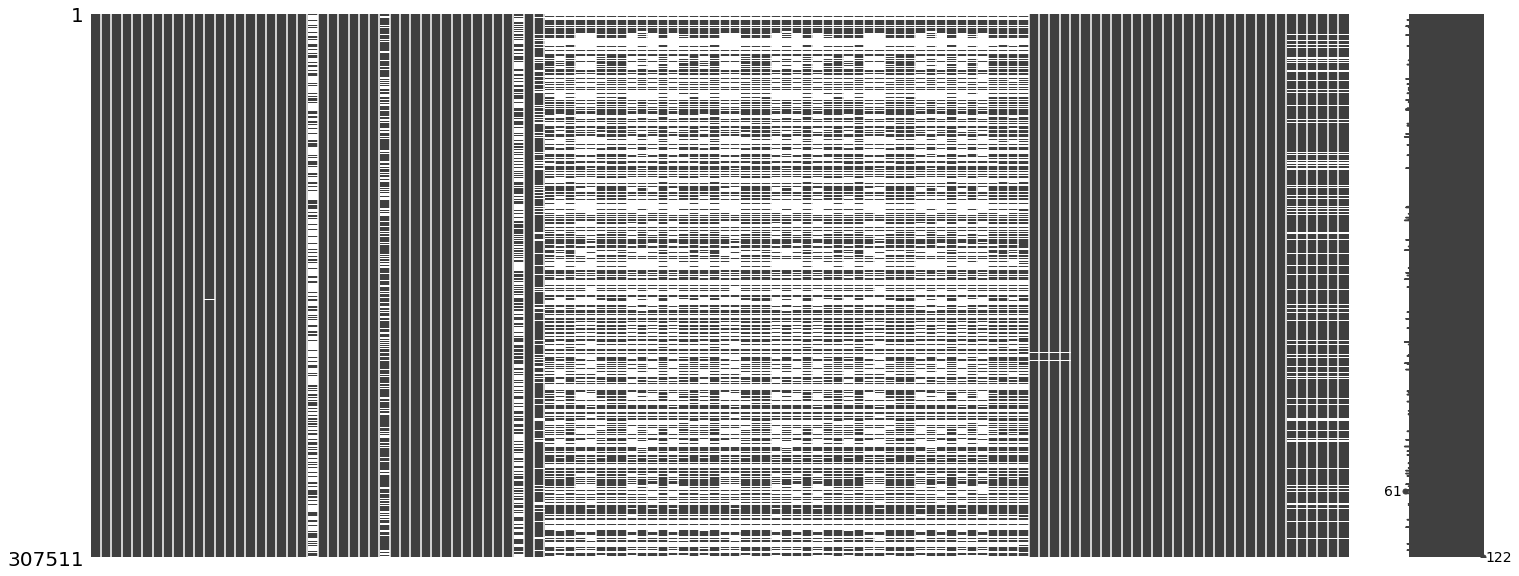

In [14]:
import missingno as mn
# Check on missing values and its distribution 
mn.matrix(appl_dat)

<AxesSubplot:>

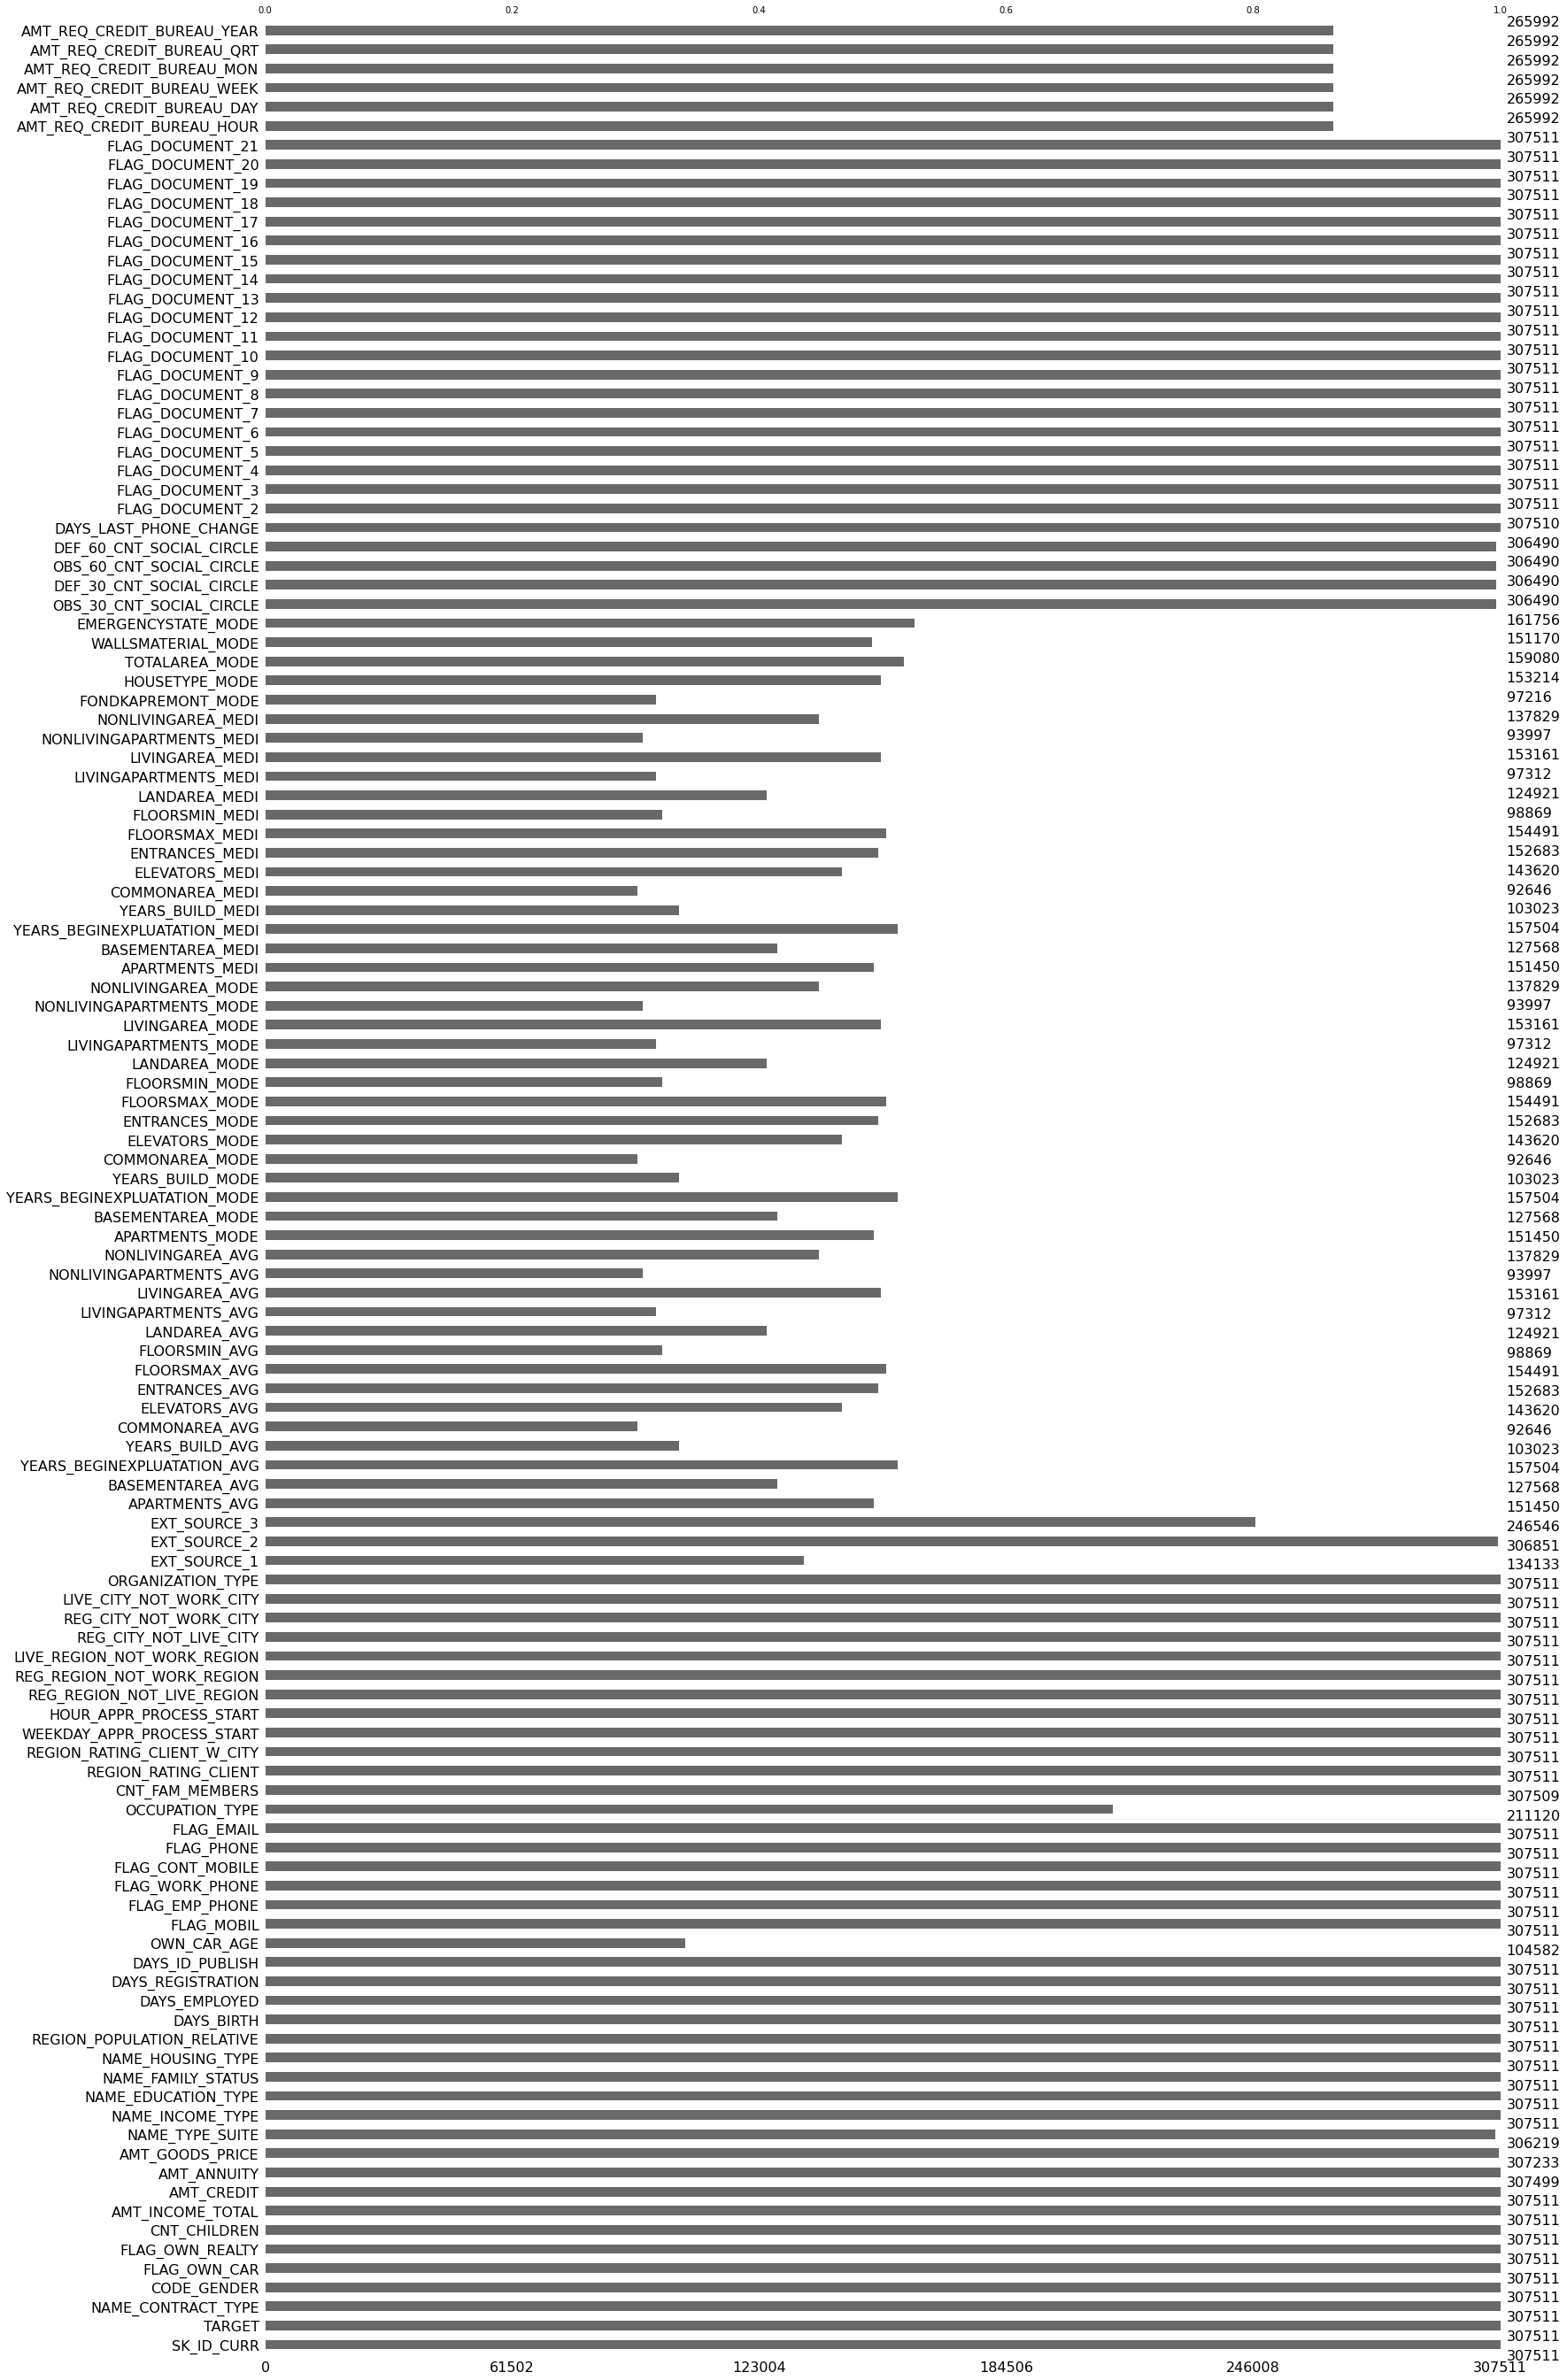

In [15]:
# Check on missing values and its distribution 
mn.bar(appl_dat)

<font color='blue'/>**Analysis** : From above graphs we notice that there are lot of missing values in multiple columns 

In [16]:
# Finding  percentage of missing values in all columns
null_ptage = round(appl_dat.isnull().mean()*100,2).sort_values(ascending = False)
null_ptage

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAPARTMENTS_MEDI       69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
LIVINGAPARTMENTS_MEDI          68.35
FLOORSMIN_AVG                  67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_MEDI                 67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_MODE               66.50
YEARS_BUILD_AVG                66.50
OWN_CAR_AGE                    65.99
LANDAREA_MEDI                  59.38
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MODE             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MEDI             55.18
E

In [17]:
# Number of columns have missing values >= 40%
len(null_ptage[null_ptage >= 40])

49

<font color='blue'/>**Analysis** : 49 columns with null percentage > 40% represent the information about the real estate /apartments  applicants own

<AxesSubplot:>

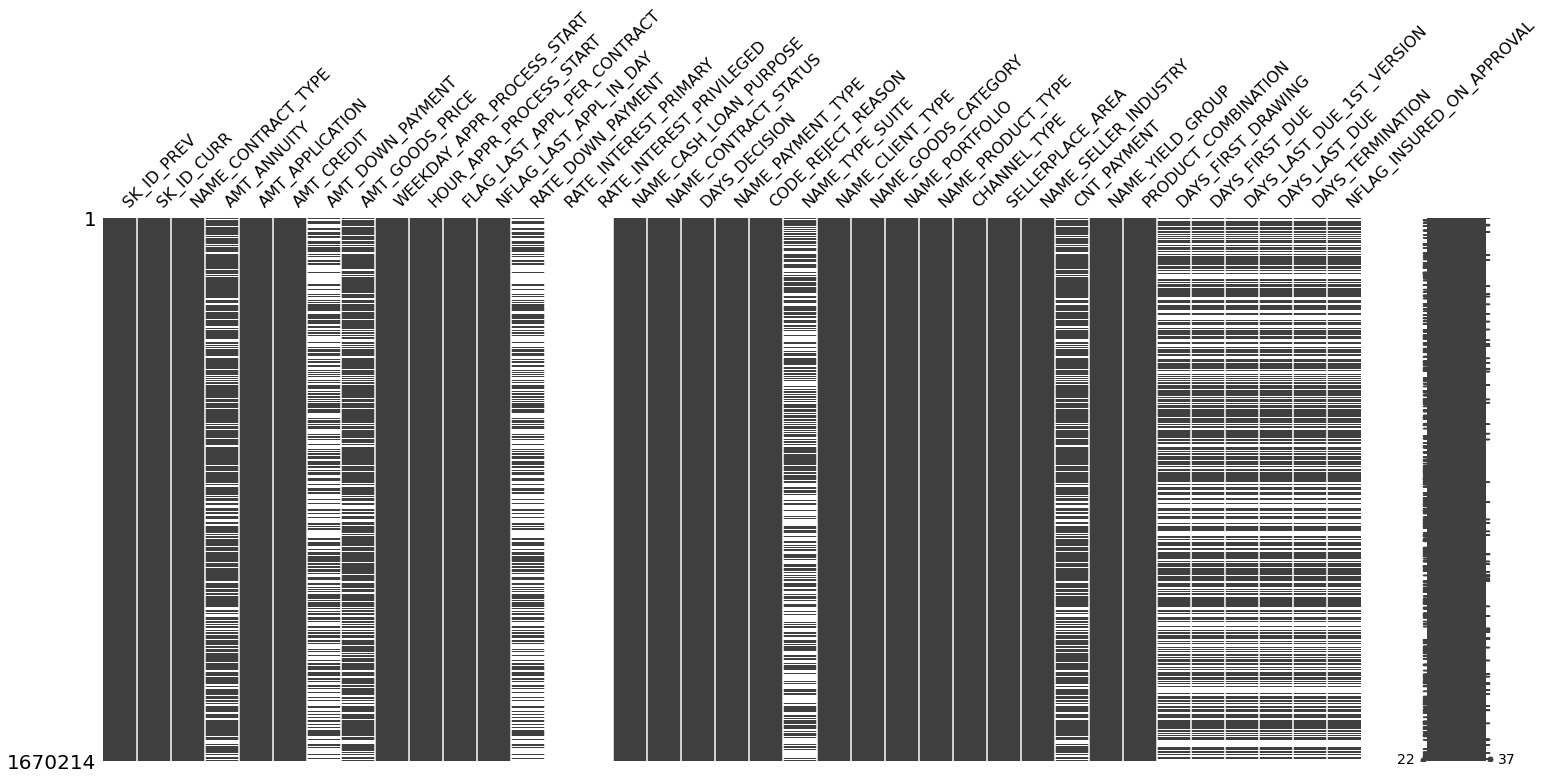

In [18]:
# Check on missing values and its distribution in previous_application data
mn.matrix(prev_appl)

<font color='blue'/>**Analysis** : From above graph we notice that there are lot of missing values in multiple columns in previous_application dataset

In [19]:
# Finding  percentage of missing values in all columns 
null_ptage = round(prev_appl.isnull().mean()*100,2).sort_values(ascending = False)
null_ptage

RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
RATE_DOWN_PAYMENT             53.64
AMT_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE               49.12
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_FIRST_DRAWING            40.30
DAYS_FIRST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_LAST_DUE                 40.30
DAYS_TERMINATION              40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
NAME_YIELD_GROUP               0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
SK_ID_PREV                     0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_CURR                     0.00
DAYS_DECISION                  0.00
NAME_CONTRACT_STATUS        

In [20]:
# Number of columns have missing values >= 40%
len(null_ptage[null_ptage >= 40])

11

<font color='blue'/>**Analysis** : 11 columns with null percentage > 40% .As information content in these columns is low. 

In [21]:
# Dropping 11 columns with >40% missing values

prev_appl= prev_appl.loc[:,prev_appl.isnull().mean() <=0.40]
prev_appl.shape

(1670214, 26)

<font color='blue'/>**Analysis** :  After deleting unnecessary columns, 26 columns remain in previous_application

### Analysing Column Descriptions

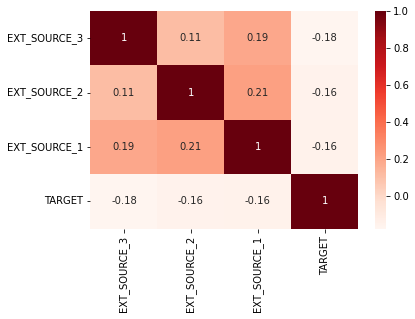

In [22]:
# Checking co-relation between EXT_SOURCE columns and TARGET  in application_data
sns.heatmap(appl_dat[["EXT_SOURCE_3",'EXT_SOURCE_2','EXT_SOURCE_1',"TARGET"]].corr(), annot = True, cmap ="Reds")
plt.show()

<font color='blue'/>**Analysis** :  EXT_SOURCE columns has no correlation with TARGET column. 
Also the missing values percetange in two columns is significant. 
We can therefore drop these columns 

#### Creating countplot for FLAG_DOCUMENT_  columns with TARGET column to understand the relevance of FLAG_DOCUMENT_ columns

In [23]:
# assigning all the FLAG_DOCUMENT's columns to col_flag_doc
col_flag_doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [24]:
# Dividing the original dataset into two different datasets depending upon the target value 
appl_dat_tgt0 = appl_dat.loc[appl_dat.TARGET == 0]
appl_dat_tgt1 = appl_dat.loc[appl_dat.TARGET == 1]

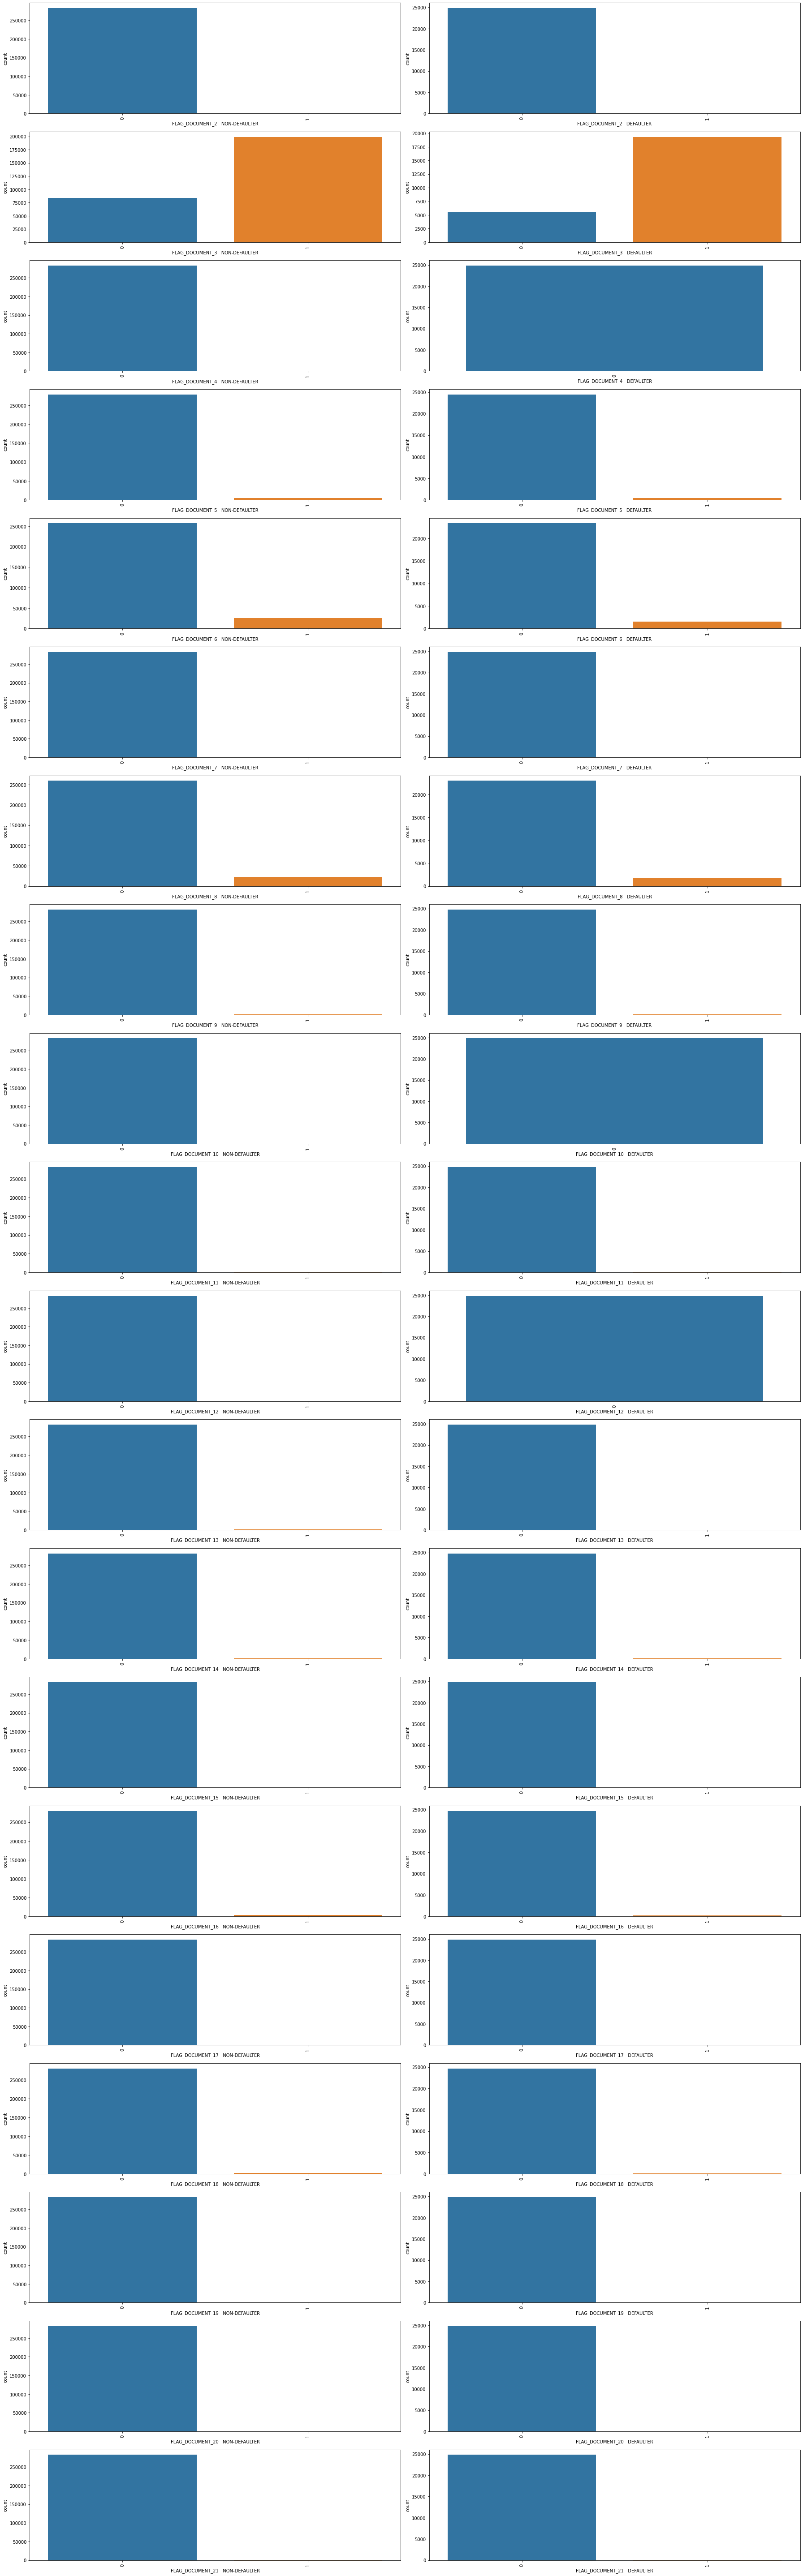

In [25]:
# Creating countplot for FLAG_DOCUMENT's  columns with TARGET column to understand the revelevance of FLAG_DOCUMENT columns

plt.figure(figsize=(25,80))
a=20
b=2
c=1
for i in col_flag_doc:
    plt.subplot(a,b,c)
    sns.countplot(appl_dat_tgt0[i])
    plt.xticks(rotation = 90)
    plt.xlabel(i+"   "+'NON-DEFAULTER')
    c=c+1
    
    plt.subplot(a,b,c)
    sns.countplot(appl_dat_tgt1[i])
    plt.xticks(rotation = 90)
    plt.xlabel(i+"   "+'DEFAULTER')
    c=c+1
plt.tight_layout()
plt.show()

<font color='blue'/>**Analysis** :  In most of the cases the client has not submitted the FLAG_DOCUMENT's 2 to 21  except FLAG_DOCUMENT_3. We can safely drop columns  FLAG_DOCUMENT's 2 to 21 leaving FLAG_DOCUMENT_3

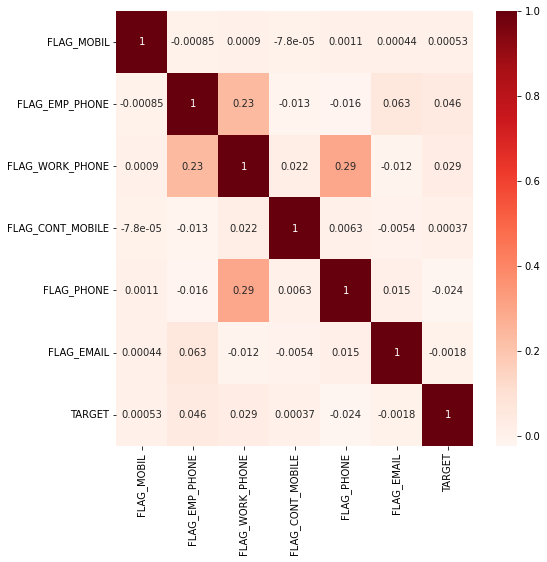

In [26]:
# Checking co-relation between communication FLAG's with the TARGET column 
fig = plt.figure(figsize=(8,8))
sns.heatmap(appl_dat[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']].corr(), annot = True, cmap ="Reds")
plt.show()

<font color='blue'/>**Analysis** :  Communication FLAG's are showing no co-relation with TARGET column. We can delete these for better analysis 

In [27]:
# columns to drop EXT_SOURCE_3, 19 FLAG_DOCUMENT's except FLAG_DOCUMENT_3 and Communication FLAG's. 
col_to_drop =  ['EXT_SOURCE_3','EXT_SOURCE_2', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL' ]

In [28]:
# Dropping columns with >40% missing values

appl_dat= appl_dat.loc[:,appl_dat.isnull().mean() <=0.40]
appl_dat.shape

(307511, 73)

In [29]:
# Dropping the unnecessary columns 

appl_dat.drop(labels=col_to_drop,axis=1,inplace=True)
appl_dat.shape

(307511, 46)

<font color='blue'/>**Analysis** :  After deleting unnecessary columns, 46 columns remain in application_data 

In [31]:
#Checking the summary of data after dropping of columns 
appl_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Data Type Check 

In [32]:
# Looking at data consitency & integrity 

for col in appl_dat.columns:
    print('-'*40 + col + '-'*40  , end=' - ')
    display(appl_dat[col].value_counts())

----------------------------------------SK_ID_CURR---------------------------------------- - 

100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

----------------------------------------TARGET---------------------------------------- - 

0    282686
1     24825
Name: TARGET, dtype: int64

----------------------------------------NAME_CONTRACT_TYPE---------------------------------------- - 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

----------------------------------------CODE_GENDER---------------------------------------- - 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

----------------------------------------FLAG_OWN_CAR---------------------------------------- - 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

----------------------------------------FLAG_OWN_REALTY---------------------------------------- - 

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

----------------------------------------CNT_CHILDREN---------------------------------------- - 

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

----------------------------------------AMT_INCOME_TOTAL---------------------------------------- - 

135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
             ...  
117324.00        1
64584.00         1
142897.50        1
109170.00        1
113062.50        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

----------------------------------------AMT_CREDIT---------------------------------------- - 

450000.00     9709
675000.00     8877
225000.00     8162
180000.00     7342
270000.00     7241
              ... 
487318.50        1
630400.50        1
1875276.00       1
1395895.50       1
1391130.00       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

----------------------------------------AMT_ANNUITY---------------------------------------- - 

9000.00      6385
13500.00     5514
6750.00      2279
10125.00     2035
37800.00     1602
             ... 
79902.00        1
106969.50       1
60885.00        1
59661.00        1
77809.50        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

----------------------------------------AMT_GOODS_PRICE---------------------------------------- - 

450000.00     26022
225000.00     25282
675000.00     24962
900000.00     15416
270000.00     11428
              ...  
1265751.00        1
503266.50         1
810778.50         1
666090.00         1
743863.50         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

----------------------------------------NAME_TYPE_SUITE---------------------------------------- - 

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

----------------------------------------NAME_INCOME_TYPE---------------------------------------- - 

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

----------------------------------------NAME_EDUCATION_TYPE---------------------------------------- - 

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

----------------------------------------NAME_FAMILY_STATUS---------------------------------------- - 

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

----------------------------------------NAME_HOUSING_TYPE---------------------------------------- - 

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

----------------------------------------REGION_POPULATION_RELATIVE---------------------------------------- - 

0.04    16408
0.05    13442
0.03    12163
0.03    11950
0.03    11601
0.03    11321
0.03    11157
0.02     8694
0.07     8412
0.02     8066
0.02     7668
0.02     7178
0.02     7038
0.02     6943
0.02     6824
0.03     6636
0.02     6404
0.02     6172
0.02     6167
0.02     6108
0.02     6052
0.01     4785
0.02     4408
0.01     4105
0.02     3807
0.01     3570
0.01     3563
0.01     3422
0.00     3300
0.01     3252
0.01     3110
0.01     3080
0.01     3079
0.01     3012
0.01     2980
0.01     2861
0.01     2818
0.01     2770
0.01     2680
0.01     2601
0.01     2467
0.01     2435
0.01     2290
0.01     2252
0.01     2177
0.01     2083
0.01     2017
0.01     1936
0.01     1834
0.01     1819
0.01     1804
0.01     1796
0.00     1783
0.01     1763
0.01     1740
0.01     1724
0.01     1684
0.01     1672
0.01     1668
0.01     1654
0.01     1653
0.00     1642
0.00     1616
0.01     1482
0.01     1225
0.01     1218
0.00     1212
0.00     1147
0.01     1087
0.01     1068
0.00     1051
0.00  

----------------------------------------DAYS_BIRTH---------------------------------------- - 

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

----------------------------------------DAYS_EMPLOYED---------------------------------------- - 

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

----------------------------------------DAYS_REGISTRATION---------------------------------------- - 

-1.00        113
-7.00         98
-6.00         96
-4.00         92
-2.00         92
            ... 
-15581.00      1
-15031.00      1
-14804.00      1
-15008.00      1
-14798.00      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

----------------------------------------DAYS_ID_PUBLISH---------------------------------------- - 

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

----------------------------------------OCCUPATION_TYPE---------------------------------------- - 

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

----------------------------------------CNT_FAM_MEMBERS---------------------------------------- - 

2.00     158357
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
14.00         2
12.00         2
20.00         2
16.00         2
13.00         1
15.00         1
11.00         1
Name: CNT_FAM_MEMBERS, dtype: int64

----------------------------------------REGION_RATING_CLIENT---------------------------------------- - 

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

----------------------------------------REGION_RATING_CLIENT_W_CITY---------------------------------------- - 

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

----------------------------------------WEEKDAY_APPR_PROCESS_START---------------------------------------- - 

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

----------------------------------------HOUR_APPR_PROCESS_START---------------------------------------- - 

10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

----------------------------------------REG_REGION_NOT_LIVE_REGION---------------------------------------- - 

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

----------------------------------------REG_REGION_NOT_WORK_REGION---------------------------------------- - 

0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

----------------------------------------LIVE_REGION_NOT_WORK_REGION---------------------------------------- - 

0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

----------------------------------------REG_CITY_NOT_LIVE_CITY---------------------------------------- - 

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

----------------------------------------REG_CITY_NOT_WORK_CITY---------------------------------------- - 

0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

----------------------------------------LIVE_CITY_NOT_WORK_CITY---------------------------------------- - 

0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

----------------------------------------ORGANIZATION_TYPE---------------------------------------- - 

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

----------------------------------------OBS_30_CNT_SOCIAL_CIRCLE---------------------------------------- - 

0.00      163910
1.00       48783
2.00       29808
3.00       20322
4.00       14143
5.00        9553
6.00        6453
7.00        4390
8.00        2967
9.00        2003
10.00       1376
11.00        852
12.00        652
13.00        411
14.00        258
15.00        166
16.00        133
17.00         88
18.00         46
19.00         44
20.00         30
21.00         29
22.00         22
23.00         15
25.00         11
24.00         11
27.00          5
26.00          3
30.00          2
28.00          1
29.00          1
47.00          1
348.00         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

----------------------------------------DEF_30_CNT_SOCIAL_CIRCLE---------------------------------------- - 

0.00     271324
1.00      28328
2.00       5323
3.00       1192
4.00        253
5.00         56
6.00         11
7.00          1
34.00         1
8.00          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

----------------------------------------OBS_60_CNT_SOCIAL_CIRCLE---------------------------------------- - 

0.00      164666
1.00       48870
2.00       29766
3.00       20215
4.00       13946
5.00        9463
6.00        6349
7.00        4344
8.00        2886
9.00        1959
10.00       1335
11.00        837
12.00        620
13.00        401
14.00        238
15.00        166
16.00        137
17.00         73
18.00         49
19.00         44
20.00         30
21.00         28
22.00         20
23.00         13
24.00         12
25.00         11
27.00          5
29.00          2
28.00          1
47.00          1
344.00         1
30.00          1
26.00          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

----------------------------------------DEF_60_CNT_SOCIAL_CIRCLE---------------------------------------- - 

0.00     280721
1.00      21841
2.00       3170
3.00        598
4.00        135
5.00         20
6.00          3
7.00          1
24.00         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

----------------------------------------DAYS_LAST_PHONE_CHANGE---------------------------------------- - 

0.00        37672
-1.00        2812
-2.00        2318
-3.00        1763
-4.00        1285
            ...  
-4051.00        1
-3593.00        1
-3622.00        1
-3570.00        1
-3538.00        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

----------------------------------------FLAG_DOCUMENT_3---------------------------------------- - 

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

----------------------------------------AMT_REQ_CREDIT_BUREAU_HOUR---------------------------------------- - 

0.00    264366
1.00      1560
2.00        56
3.00         9
4.00         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

----------------------------------------AMT_REQ_CREDIT_BUREAU_DAY---------------------------------------- - 

0.00    264503
1.00      1292
2.00       106
3.00        45
4.00        26
5.00         9
6.00         8
9.00         2
8.00         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

----------------------------------------AMT_REQ_CREDIT_BUREAU_WEEK---------------------------------------- - 

0.00    257456
1.00      8208
2.00       199
3.00        58
4.00        34
6.00        20
5.00        10
8.00         5
7.00         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

----------------------------------------AMT_REQ_CREDIT_BUREAU_MON---------------------------------------- - 

0.00     222233
1.00      33147
2.00       5386
3.00       1991
4.00       1076
5.00        602
6.00        343
7.00        298
9.00        206
8.00        185
10.00       132
11.00       119
12.00        77
13.00        72
14.00        40
15.00        35
16.00        23
17.00        14
18.00         6
19.00         3
24.00         1
23.00         1
27.00         1
22.00         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

----------------------------------------AMT_REQ_CREDIT_BUREAU_QRT---------------------------------------- - 

0.00      215417
1.00       33862
2.00       14412
3.00        1717
4.00         476
5.00          64
6.00          28
8.00           7
7.00           7
261.00         1
19.00          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

----------------------------------------AMT_REQ_CREDIT_BUREAU_YEAR---------------------------------------- - 

0.00     71801
1.00     63405
2.00     50192
3.00     33628
4.00     20714
5.00     12052
6.00      6967
7.00      3869
8.00      2127
9.00      1096
11.00       31
12.00       30
10.00       22
13.00       19
14.00       10
17.00        7
15.00        6
19.00        4
18.00        4
16.00        3
25.00        1
23.00        1
22.00        1
21.00        1
20.00        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

<font color='blue'/>**Analysis** : Standarize the values:  Converting negative days in DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE into postive values as days cannot be in negative values.
Convert Negative days in DAYS_BIRTH in to positive values and calculate the DAY_BIRTH to AGE 

<font color='blue'/>**Analysis** : Standarize the values:  Categorize amount variables in to bins 

In [33]:
# Converting DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE to positve days 

def absolute(x):
    return abs(x)

appl_dat[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE" ]] = appl_dat[["DAYS_BIRTH", "DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE" ]].apply(absolute)

In [34]:
# Creating new column "AGE" from DAYS_BIRTH
appl_dat["AGE"] = appl_dat["DAYS_BIRTH"].apply(lambda x : round(x/365))

In [35]:
# checking the new column 'AGE' and also the conversion to postive values 
appl_dat["AGE"].unique()

array([26, 46, 52, 55, 38, 40, 28, 56, 37, 39, 24, 35, 27, 49, 31, 50, 41,
       68, 53, 51, 44, 42, 36, 32, 33, 47, 58, 66, 48, 65, 22, 54, 34, 29,
       59, 63, 30, 62, 25, 45, 60, 43, 57, 69, 64, 61, 23, 21, 67],
      dtype=int64)

In [36]:
# Binning numerical columns to create a categorical column
# Creating bins for Income column

appl_dat['AMT_INCOME_TOTAL']=appl_dat['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

appl_dat['AMT_INCOME_RANGE']=pd.cut(appl_dat['AMT_INCOME_TOTAL'],bins=bins,labels=range)

In [37]:
# Checking the bin created for 'AMT_INCOME_TOTAL'
appl_dat["AMT_INCOME_RANGE"].value_counts(normalize= True)*100

100K-200K   50.73
200k-300k   21.21
0-100K      20.73
300k-400k    4.78
400k-500k    1.74
500k-600k    0.36
600k-700k    0.28
800k-900k    0.10
700k-800k    0.05
900k-1M      0.01
1M Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

<font color='blue'/>**Analysis** :  90% of applicants have income less than 300000 

In [38]:
# Creating bins for Income column

appl_dat['AMT_CREDIT']=appl_dat['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

appl_dat['AMT_CREDIT_RANGE']=pd.cut(appl_dat['AMT_CREDIT'],bins=bins,labels=range)

In [39]:
# Checking the bin created for 'AMT_CREDIT'
appl_dat["AMT_CREDIT_RANGE"].value_counts(normalize= True)*100

200k-300k   17.82
1M Above    16.25
500k-600k   11.13
400k-500k   10.42
100K-200K    9.80
300k-400k    8.56
600k-700k    7.82
800k-900k    7.09
700k-800k    6.24
900k-1M      2.90
0-100K       1.95
Name: AMT_CREDIT_RANGE, dtype: float64

<font color='blue'/>**Analysis** : More then 16% applicants has taken loan more than 1M

In [40]:
# Creating bins for age column

bins = [0,20,30,40,50,80]
range = ['0-20','25-30','30-40','40-50','50+']
appl_dat["AGE_RANGE"] = pd.cut(appl_dat["AGE"], bins = bins , labels=range)

In [41]:
# Checking the bin created for 'AGE'
appl_dat["AGE_RANGE"].value_counts(normalize = True)*100

50+     32.64
30-40   26.92
40-50   24.55
25-30   15.89
0-20     0.00
Name: AGE_RANGE, dtype: float64

<font color='blue'/>**Analysis** : more than 32% applicanta are above 50+ age 

In [42]:
# creating new column "YEARS_EMPLOYED"
appl_dat["YEARS_EMPLOYED"] = appl_dat["DAYS_EMPLOYED"].apply(lambda x: round(x/365))

In [43]:
# Creating bins for 'YEARS_EMPLOYED'
bins = [0,5,10,20,30,40,50,60,150]
range = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
appl_dat['YEAR_EMPLOYMENT_RANGE']=pd.cut(appl_dat['YEARS_EMPLOYED'],bins=bins,labels=range)

In [44]:
# Checking the bin created for 'YEARS_EMPLOYED'
appl_dat['YEAR_EMPLOYMENT_RANGE'].value_counts(normalize = True)*100

0-5        55.77
5-10       24.80
10-20      14.62
20-30       3.68
30-40       1.05
40-50       0.08
50-60       0.00
60 above    0.00
Name: YEAR_EMPLOYMENT_RANGE, dtype: float64

<font color='blue'/>**Analysis** : More than 55% applicants have 5years of work experience

In [45]:
# Checking for the employment years > 100
appl_dat[appl_dat["YEARS_EMPLOYED"] > 100].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

<font color='blue'/>**Analysis** : Anamoly in Pensioner and Umemployed category

### Standardize the datatypes

In [46]:
#checking for number unique values in each column
appl_dat.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AGE_RANGE                           4
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
YEAR_EMPLOYMENT_RANGE               6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [47]:
# Checking columns for correct datatypes
appl_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

<font color='blue'/>**Analysis** : Numeric Columns are in float64 and int64 . Remaining column datatypes need to converted to categorical columns  

In [48]:
# converting object datatype columns in to categorical datatypes

cat_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
               'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
               'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
               'REGION_RATING_CLIENT_W_CITY']
                      
    
for col in cat_columns:
    appl_dat[col] =pd.Categorical(appl_dat[col])

In [49]:
# Checking on data summary after data type standardization 
appl_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Imputing missing values 

In [50]:
# Checking  percentage of missing values in remaining columns 
round(appl_dat.isnull().mean()*100,2).sort_values(ascending = False)

OCCUPATION_TYPE               31.35
YEAR_EMPLOYMENT_RANGE         21.18
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_INCOME_RANGE               0.08
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
ORGANIZATION_TYPE              0.00
YEARS_EMPLOYED                 0.00
AGE                            0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_3                0.00
AGE_RANGE                      0.00
REG_REGION_NOT_WORK_REGION     0.00
AMT_CREDIT_RANGE               0.00
LIVE_REGION_NOT_WORK_REGION    0.00
SK_ID_CURR                  

In [51]:
# In 'OCCUPATION_TYPE' missing value percentage is higher (35.5), we will not use Mode to replace missing values, 
# we will therefore replace it with new category "OT_Missing"
appl_dat['OCCUPATION_TYPE'] = appl_dat['OCCUPATION_TYPE'].cat.add_categories('Unknown')
appl_dat['OCCUPATION_TYPE'].fillna(value= "Unknown",inplace = True)

In [52]:
# Running statistic summary to check on central tendencies 
appl_dat[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
          "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]].describe().transpose()

count  mean  std  min  25%  50%  75%    max
AMT_REQ_CREDIT_BUREAU_HOUR 265992.00  0.01 0.08 0.00 0.00 0.00 0.00   4.00
AMT_REQ_CREDIT_BUREAU_DAY  265992.00  0.01 0.11 0.00 0.00 0.00 0.00   9.00
AMT_REQ_CREDIT_BUREAU_WEEK 265992.00  0.03 0.20 0.00 0.00 0.00 0.00   8.00
AMT_REQ_CREDIT_BUREAU_MON  265992.00  0.27 0.92 0.00 0.00 0.00 0.00  27.00
AMT_REQ_CREDIT_BUREAU_QRT  265992.00  0.27 0.79 0.00 0.00 0.00 0.00 261.00
AMT_REQ_CREDIT_BUREAU_YEAR 265992.00  1.90 1.87 0.00 0.00 1.00 3.00  25.00

<font color='blue'/>**Analysis** :  Impute with median as mean has decimals and this is number of requests

In [53]:
# IMPUTING Columns "AMT_REQ_CREDIT_BUREAU_YEAR/ _QRT/ _MON/ _WEEK/ _DAY/ _HOUR" with Mode makes sense as they are number of credit enquiries. 

appl_dat["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(appl_dat["AMT_REQ_CREDIT_BUREAU_HOUR"].median(), inplace = True)   
appl_dat["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(appl_dat["AMT_REQ_CREDIT_BUREAU_DAY"].median(), inplace = True) 
appl_dat["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(appl_dat["AMT_REQ_CREDIT_BUREAU_WEEK"].median(), inplace = True) 
appl_dat["AMT_REQ_CREDIT_BUREAU_MON"].fillna(appl_dat["AMT_REQ_CREDIT_BUREAU_MON"].median(), inplace = True) 
appl_dat["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(appl_dat["AMT_REQ_CREDIT_BUREAU_QRT"].median(), inplace = True)
appl_dat["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(appl_dat["AMT_REQ_CREDIT_BUREAU_YEAR"].median(), inplace = True)

<font color='blue'/>**Analysis** : IMPUTING "NAME_TYPE_SUITE" with Mode as this is a categorical column and the missing value percentage are low 0.42% 

In [54]:
# Imputing column 'NAME_TYPE_SUITE' with mode
appl_dat["NAME_TYPE_SUITE"].fillna(appl_dat["NAME_TYPE_SUITE"].mode()[0], inplace = True)

<font color='blue'/>**Analysis** : IMPUTING Columns with missing value percentage < 1% with Median as they are float columns.

In [55]:
# IMPUTING Columns with missing value percentage < 1% with Median as they are float columns.

appl_dat["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(appl_dat["OBS_30_CNT_SOCIAL_CIRCLE"].median(), inplace = True)  
appl_dat["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(appl_dat["DEF_30_CNT_SOCIAL_CIRCLE"].median(), inplace = True)
appl_dat["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(appl_dat["OBS_60_CNT_SOCIAL_CIRCLE"].median(), inplace = True)
appl_dat["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(appl_dat["DEF_60_CNT_SOCIAL_CIRCLE"].median(), inplace = True) 
appl_dat["AMT_GOODS_PRICE"].fillna(appl_dat["AMT_GOODS_PRICE"].median(), inplace = True)
appl_dat["AMT_ANNUITY"].fillna(appl_dat["AMT_ANNUITY"].median(), inplace = True)
appl_dat["CNT_FAM_MEMBERS"].fillna(appl_dat["CNT_FAM_MEMBERS"].median(), inplace = True)


### Imputing missing values and data cleaning, standardisation of data types  in previous_application dataframe

In [56]:
#Looking at consitency & Integrity 

for col in prev_appl.columns:
    print('-'*40 + col + '-'*40  , end=' - ')
    display(prev_appl[col].value_counts())

----------------------------------------SK_ID_PREV---------------------------------------- - 

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

----------------------------------------SK_ID_CURR---------------------------------------- - 

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

----------------------------------------NAME_CONTRACT_TYPE---------------------------------------- - 

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

----------------------------------------AMT_ANNUITY---------------------------------------- - 

2250.00     31865
11250.00    13974
6750.00     13442
9000.00     12496
22500.00    11903
            ...  
3794.45         1
8723.16         1
27948.33        1
25374.28        1
14704.29        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

----------------------------------------AMT_APPLICATION---------------------------------------- - 

0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: AMT_APPLICATION, Length: 93885, dtype: int64

----------------------------------------AMT_CREDIT---------------------------------------- - 

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

----------------------------------------AMT_GOODS_PRICE---------------------------------------- - 

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

----------------------------------------WEEKDAY_APPR_PROCESS_START---------------------------------------- - 

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

----------------------------------------HOUR_APPR_PROCESS_START---------------------------------------- - 

11    192728
12    185980
10    181690
13    172256
14    157711
15    142965
9     127002
16    121361
17     95064
8      73085
18     64156
7      45646
19     34089
6      25759
5      15392
20     14535
4       9319
3       5035
21      4082
2       1116
22       720
1        212
23       202
0        109
Name: HOUR_APPR_PROCESS_START, dtype: int64

----------------------------------------FLAG_LAST_APPL_PER_CONTRACT---------------------------------------- - 

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

----------------------------------------NFLAG_LAST_APPL_IN_DAY---------------------------------------- - 

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

----------------------------------------NAME_CASH_LOAN_PURPOSE---------------------------------------- - 

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

----------------------------------------NAME_CONTRACT_STATUS---------------------------------------- - 

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

----------------------------------------DAYS_DECISION---------------------------------------- - 

-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

----------------------------------------NAME_PAYMENT_TYPE---------------------------------------- - 

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

----------------------------------------CODE_REJECT_REASON---------------------------------------- - 

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

----------------------------------------NAME_CLIENT_TYPE---------------------------------------- - 

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

----------------------------------------NAME_GOODS_CATEGORY---------------------------------------- - 

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

----------------------------------------NAME_PORTFOLIO---------------------------------------- - 

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

----------------------------------------NAME_PRODUCT_TYPE---------------------------------------- - 

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

----------------------------------------CHANNEL_TYPE---------------------------------------- - 

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

----------------------------------------SELLERPLACE_AREA---------------------------------------- - 

-1       762675
 0        60523
 50       37401
 30       34423
 20       33840
          ...  
 1014         1
 1256         1
 677          1
 7518         1
 1446         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

----------------------------------------NAME_SELLER_INDUSTRY---------------------------------------- - 

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

----------------------------------------CNT_PAYMENT---------------------------------------- - 

12.00    323049
6.00     190461
0.00     144985
10.00    141851
24.00    137764
18.00     77430
36.00     72583
60.00     53600
48.00     47316
8.00      30349
4.00      26924
30.00     16924
14.00      8253
42.00      7136
16.00      5710
5.00       3957
54.00      2104
20.00      1805
7.00       1434
9.00       1236
3.00       1100
15.00       904
11.00       669
72.00       139
13.00        51
17.00        48
84.00        45
22.00        37
23.00        27
26.00        13
35.00        11
66.00        10
28.00         8
29.00         8
32.00         6
19.00         6
34.00         4
59.00         4
41.00         3
47.00         3
45.00         3
21.00         3
44.00         2
39.00         2
46.00         2
38.00         2
33.00         1
40.00         1
53.00         1
Name: CNT_PAYMENT, dtype: int64

----------------------------------------NAME_YIELD_GROUP---------------------------------------- - 

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

----------------------------------------PRODUCT_COMBINATION---------------------------------------- - 

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

<font color='blue'/>**Analysis**: DAYS_DECISION has negative values , XNA category found in NAME_CONTRACT_TYPE & NAME_CLIENT to be handled. In columns where percentages of XNA & XAP are high, it to be ignored 

In [57]:
# converting -ve values to positive 
prev_appl["DAYS_DECISION"] = prev_appl["DAYS_DECISION"].apply(absolute)

In [58]:
# Checking  percentage of missing values in previous_application 
round(prev_appl.isnull().mean()*100,2).sort_values(ascending = False)

AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
NAME_PAYMENT_TYPE              0.00
NAME_YIELD_GROUP               0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
NAME_PORTFOLIO                 0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_STATUS           0.00
NAME_CASH_LOAN_PURPOSE         0.00
NFLAG_LAST_APPL_IN_DAY         0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
HOUR_APPR_PROCESS_START        0.00
WEEKDAY_APPR_PROCESS_START     0.00
AMT_CREDIT                     0.00
AMT_APPLICATION                0.00
NAME_CONTRACT_TYPE             0.00
DAYS_DECISION                  0.00
dtype: float64

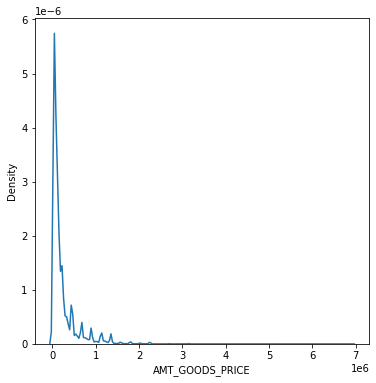

In [59]:
# PLotting KDE plot for AMT_GOODS_PRICE to check imputing with central tendencies 
plt.figure(figsize=(6,6))
sns.kdeplot(prev_appl['AMT_GOODS_PRICE'])
plt.show()

<font color='blue'/>**Analysis** :Plotting distribution plot with mode & median 

In [60]:
# new dataframe with columns imputed with mode and median for comparision with original distribution
prev_appl_N = pd.DataFrame() 
prev_appl_N['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0])
prev_appl_N['AMT_GOODS_PRICE_median'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median())

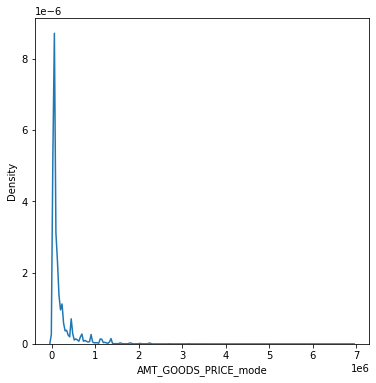

In [61]:
# PLotting KDE plot for AMT_GOODS_PRICE to check imputing with central tendencies - mode
plt.figure(figsize=(6,6))
sns.kdeplot(prev_appl_N['AMT_GOODS_PRICE_mode'])
plt.show()

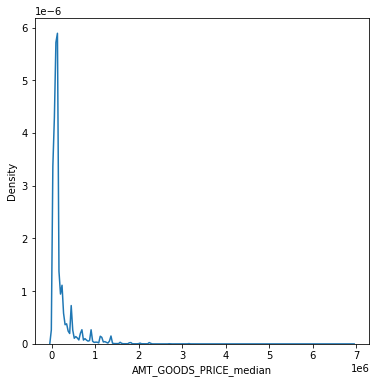

In [62]:
# new dataframe with columns imputed with mode and median for comparision with original distribution - median
plt.figure(figsize=(6,6))
sns.kdeplot(prev_appl_N['AMT_GOODS_PRICE_median'])
plt.show()

<font color='blue'/>**Analysis** :Original distribution is similar to the distribution plot imputed with mode. 

In [63]:
# Replacing missing values with Mode as its KDE plot is similar to original 

prev_appl["AMT_GOODS_PRICE"].fillna(prev_appl["AMT_GOODS_PRICE"].mode()[0], inplace = True)

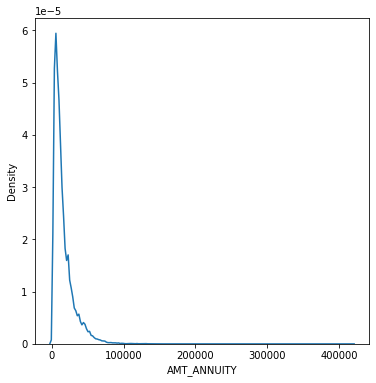

In [64]:
# Plotting KDE plot for 'AMT_ANNUITY'
plt.figure(figsize=(6,6))
sns.kdeplot(prev_appl['AMT_ANNUITY'])
plt.show()

<font color='blue'/>**Analysis** :Distribution is right skewed hence imputing the AMT_ANNUITY with median 

In [65]:
# Replacing missing values with Median 

prev_appl["AMT_ANNUITY"].fillna(prev_appl["AMT_ANNUITY"].median(), inplace = True)

In [66]:
# looking at the relation of CNT_PAYMENT for records which has nulls wih NAME_CONTRACT_STATUS
prev_appl.loc[prev_appl['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

<font color='blue'/>**Analysis** :Imputing  CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these loans are Cancelled,Refused and Unused.

In [67]:
# Imputing nulls in CNT_PAYMENT with zero
prev_appl['CNT_PAYMENT'].fillna(0,inplace = True)

<font color='blue'/>**Analysis** : We Have 0.02 percent null values under PRODUCT_COMBINATION. Which we can ignore

In [68]:
#Checking summary of previous_application
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [69]:
# converting columns with Object  to Categorical Columns 

prev_appl["NAME_CONTRACT_TYPE"] = pd.Categorical(prev_appl["NAME_CONTRACT_TYPE"])
prev_appl["WEEKDAY_APPR_PROCESS_START"] = pd.Categorical(prev_appl["WEEKDAY_APPR_PROCESS_START"])
prev_appl["FLAG_LAST_APPL_PER_CONTRACT"] = pd.Categorical(prev_appl["FLAG_LAST_APPL_PER_CONTRACT"])
prev_appl["NAME_CASH_LOAN_PURPOSE"] = pd.Categorical(prev_appl["NAME_CASH_LOAN_PURPOSE"])
prev_appl["NAME_CONTRACT_STATUS"] = pd.Categorical(prev_appl["NAME_CONTRACT_STATUS"])
prev_appl["NAME_PAYMENT_TYPE"] = pd.Categorical(prev_appl["NAME_PAYMENT_TYPE"])
prev_appl["CODE_REJECT_REASON"] = pd.Categorical(prev_appl["CODE_REJECT_REASON"])
prev_appl["NAME_GOODS_CATEGORY"] = pd.Categorical(prev_appl["NAME_GOODS_CATEGORY"])
prev_appl["NAME_PORTFOLIO"] = pd.Categorical(prev_appl["NAME_PORTFOLIO"])
prev_appl["NAME_PRODUCT_TYPE"] = pd.Categorical(prev_appl["NAME_PRODUCT_TYPE"])
prev_appl["CHANNEL_TYPE"] = pd.Categorical(prev_appl["CHANNEL_TYPE"])
prev_appl["NAME_SELLER_INDUSTRY"] = pd.Categorical(prev_appl["NAME_SELLER_INDUSTRY"])
prev_appl["NAME_YIELD_GROUP"] = pd.Categorical(prev_appl["NAME_YIELD_GROUP"])
prev_appl["PRODUCT_COMBINATION"] = pd.Categorical(prev_appl["PRODUCT_COMBINATION"])
prev_appl["NAME_CLIENT_TYPE"] = pd.Categorical(prev_appl["NAME_CLIENT_TYPE"])

###  Finding Outliers 

In [70]:
# Function to automate dist and box plots

def dist_box_plot(dataset,column):
    
    plt.subplots(1,2 ,figsize = (15,4))

    plt.subplot(1,2,1)
    sns.set_theme()
    sns.distplot(dataset[column], color = 'blue')
    pltname = 'Distplot of ' + column
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(pltname)

    plt.subplot(1,2,2)
    sns.set_theme(style="whitegrid")
    sns.boxplot(y = column, data = dataset, fliersize = 10)
    pltname = 'Boxplot of ' + column
    plt.title(pltname)
   
    plt.show()

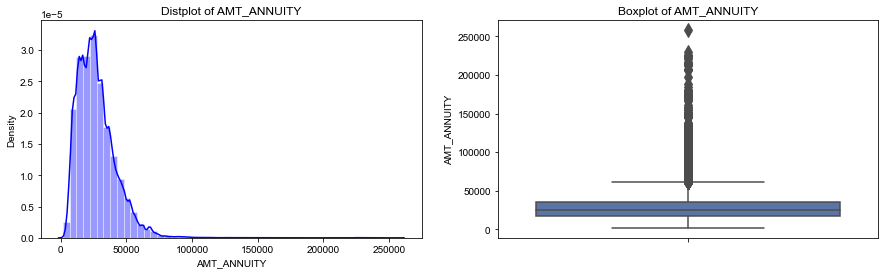

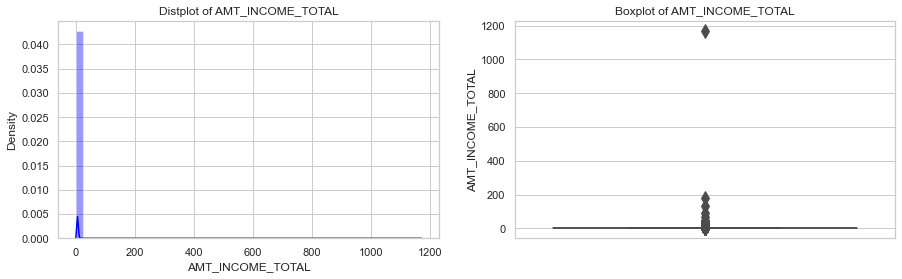

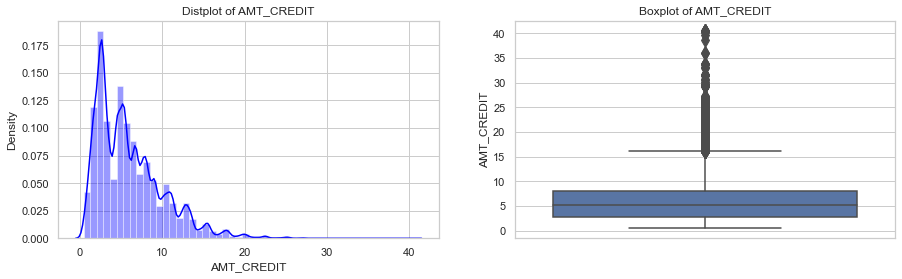

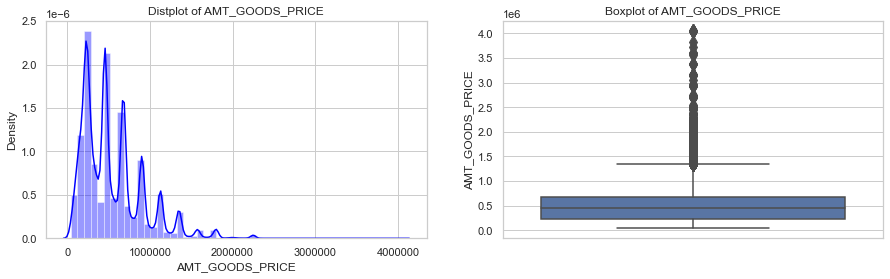

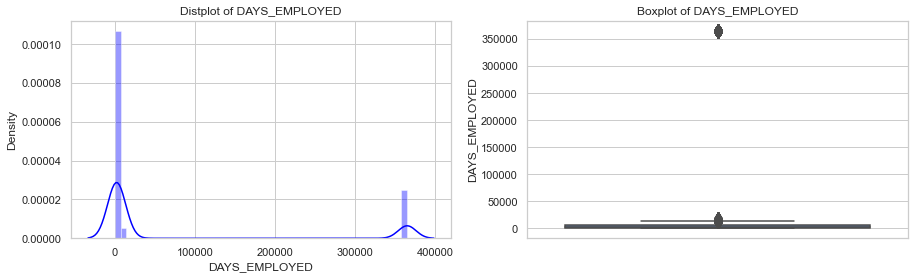

In [71]:
# Plotting distribution and box plot for columns - AMT_ANNUITY, AMT_INCOME_TOTAL, AMT_CREDIT,AMT_GOODS_PRICE, DAYS_Employed
dist_box_plot(appl_dat,'AMT_ANNUITY')
dist_box_plot(appl_dat,'AMT_INCOME_TOTAL')
dist_box_plot(appl_dat,'AMT_CREDIT')
dist_box_plot(appl_dat,'AMT_GOODS_PRICE')
dist_box_plot(appl_dat,'DAYS_EMPLOYED')

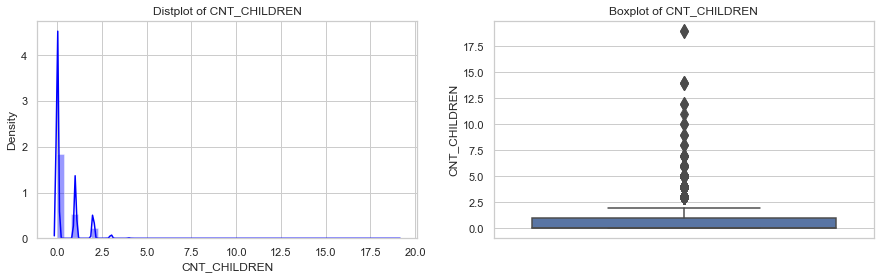

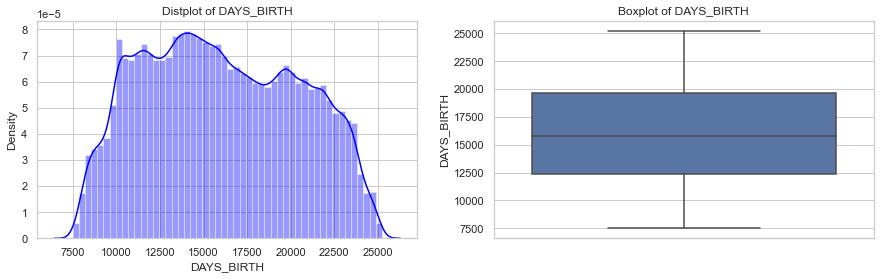

In [72]:
# Plotting distribution and box plot for columns - CNT_CHILDREN, DAYS_BIRTH
dist_box_plot(appl_dat,'CNT_CHILDREN')
dist_box_plot(appl_dat,'DAYS_BIRTH')

<font color='blue'/>**Analysis** :AMT_INCOME_TOTAL has huge outliers. AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, have some number of outliers.  CNT_CHILDREN: a)count of applicants have more than 3 children is minimal.b)more than 99.5% applicants have upto 3 children c) We can say that applicants with more than 3 childrens are outliers. DAYS_BIRTH has no outliers which means the data available is reliable. DAYS_EMPLOYED has values of 365243 days,  is clearly a wrong entry.

In [73]:
# Stastistic summary of above columns 
appl_dat[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  DAYS_BIRTH  CNT_CHILDREN  DAYS_EMPLOYED
count    307511.00         307511.00   307511.00        307511.00   307511.00     307511.00      307511.00
mean      27108.49              1.69        5.99        538316.29    16037.00          0.42       67724.74
std       14493.46              2.37        4.02        369288.98     4363.99          0.72      139443.75
min        1615.50              0.26        0.45         40500.00     7489.00          0.00           0.00
25%       16524.00              1.12        2.70        238500.00    12413.00          0.00         933.00
50%       24903.00              1.47        5.14        450000.00    15750.00          0.00        2219.00
75%       34596.00              2.02        8.09        679500.00    19682.00          1.00        5707.00
max      258025.50           1170.00       40.50       4050000.00    25229.00         19.00      365243.00

#### Finding Outliers in previous_application 

In [ ]:
# Plotting distribution and box plot for columns to check on outliers in previous_application dataframe 
dist_box_plot(prev_appl,'AMT_ANNUITY')
dist_box_plot(prev_appl,'AMT_APPLICATION')
dist_box_plot(prev_appl,'AMT_CREDIT')
dist_box_plot(prev_appl,'AMT_GOODS_PRICE')
dist_box_plot(prev_appl,'SELLERPLACE_AREA')

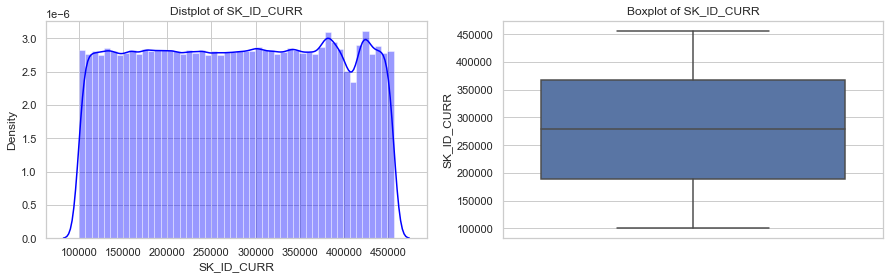

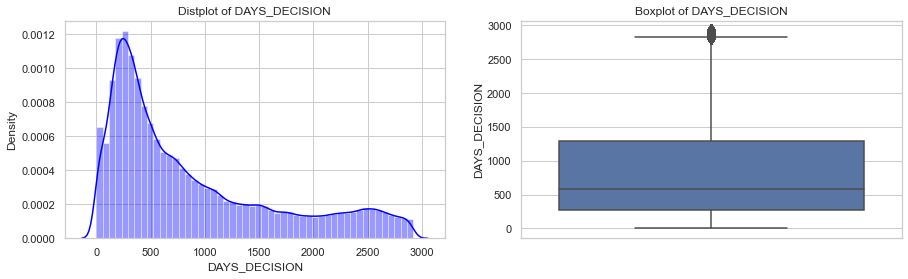

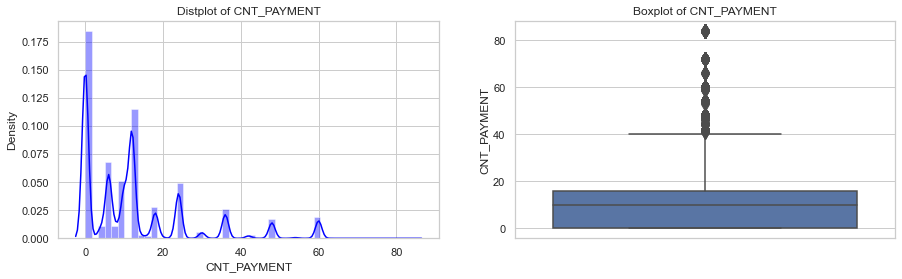

In [74]:
# Plotting distribution and box plot for columns to check on outliers in previous_application dataframe 
dist_box_plot(prev_appl,'SK_ID_CURR')
dist_box_plot(prev_appl,'DAYS_DECISION')
dist_box_plot(prev_appl,'CNT_PAYMENT')

<font color='blue'/>**Analysis** : AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have many outliers. SK_ID_CURR is an ID column and hence no outliers. DAYS_DECISION has little number of outliers.  CNT_PAYMENT has few outlier values.

In [75]:
# To suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

In [76]:
# statistic summary of above columns 
prev_appl[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION
count 1670214.00000    1670214.00000 1670213.00000    1670214.00000     1670214.00000 1670214.00000  1670214.00000
mean    14906.50618     175233.86036  196114.02122     185642.88579         313.95112      12.47621      880.67967
std     13177.51410     292779.76239  318574.61655     287141.31609        7127.44346      14.47588      779.09967
min         0.00000          0.00000       0.00000          0.00000          -1.00000       0.00000        1.00000
25%      7547.09625      18720.00000   24160.50000      45000.00000          -1.00000       0.00000      280.00000
50%     11250.00000      71046.00000   80541.00000      71050.50000           3.00000      10.00000      581.00000
75%     16824.02625     180360.00000  216418.50000     180405.00000          82.00000      16.00000     1300.00000
max    418058.14500    6905160.00000 6905160.00000    6905160.00000     4000000.00000      84.00000     2922.00000

#### Dealing with error /unknown data values

In [77]:
# analysis of  CODE_GENDER column
appl_dat.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [78]:
# checking if the rows have genuine data 
appl_dat[appl_dat['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  \
35657       141289       0    Revolving loans         XNA            Y               Y             0           2.07000     3.82500  19125.00000     337500.00000   Unaccompanied               Working  Secondary / secondary special            Married  Municipal apartment                     0.02071       20232          10044        10024.00000             3537             Unknown          2.00000                    3                           3                    TUESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 1                   0.00000                   0.00000                   0.00000                   0.00000               286.00000                0                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     1.00000   55   
38566       144669       0    Revolving loans         XNA            N               Y             2           1.57500     2.70000  13500.00000     225000.00000          Family               Working  Secondary / secondary special            Married    House / apartment                     0.02639       13717           2797         2241.00000             4659  Low-skill Laborers          4.00000                    2                           2                     FRIDAY                       16                           0                          0                           0                      0                      0                       0        Industry: type 3                   0.00000                   0.00000                   0.00000                   0.00000               493.00000                0                     0.00000                    0.00000                     0.00000                    3.00000                    0.00000                     4.00000   38   
83382       196708       0    Revolving loans         XNA            N               Y             1           1.35000     4.05000  20250.00000     225000.00000   Unaccompanied               Working               Higher education            Married    House / apartment                     0.03579       10647           1228          183.00000             1671          Core staff          3.00000                    2                           2                   THURSDAY                       15                           0                          0                           0                      0                      0                       0            Kindergarten                   7.00000                   1.00000                   7.00000                   1.00000               851.00000                0                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     3.00000   29   
189640      319880       0    Re

<font color='blue'/>**Analysis** :Data looks valid. As Female numbers are almost twice. We will impute these rows with 'F'

In [79]:
# Imputing rows having 'XNA' with 'F'
appl_dat["CODE_GENDER"] = appl_dat["CODE_GENDER"].apply(lambda x : 'F' if x == 'XNA' else x)

In [80]:
# checking for data error in column 'NAME_FAMILY_STATUS'
appl_dat["NAME_FAMILY_STATUS"].value_counts(normalize = True)*100

Married                63.87804
Single / not married   14.77801
Civil marriage          9.68258
Separated               6.42904
Widow                   5.23168
Unknown                 0.00065
Name: NAME_FAMILY_STATUS, dtype: float64

In [81]:
# Checking on rows with 'Unknown' have genuine data
appl_dat[appl_dat["NAME_FAMILY_STATUS"] == "Unknown"]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE AMT_INCOME_RANGE  \
41982       148605       0    Revolving loans           M            N               Y             0           4.50000     6.75000  33750.00000     450000.00000   Unaccompanied  Commercial associate     Lower secondary            Unknown  Municipal apartment                     0.01522       12396           1161         3265.00000             4489        Managers          2.00000                    2                           2                   THURSDAY                       15                           0                          1                           1                      0                      1                       1               Insurance                   3.00000                   0.00000                   3.00000                   0.00000               876.00000                0                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     1.00000   34        400k-500k   
187348      317181       0    Revolving loans           F            N               Y             0           2.02500     5.85000  29250.00000     450000.00000   Unaccompanied  Commercial associate    Higher education            Unknown    House / apartment                     0.03133       12844            232         1597.00000             1571     Accountants          2.00000                    2                           2                     FRIDAY                       14                           0                          0                           0                      0                      0                       0  Business Entity Type 2                   1.00000                   0.00000                   1.00000                   0.00000               654.00000                0                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     1.00000   35        200k-300k   

       AMT_CREDIT_RANGE AGE_RANGE  YEARS_EMPLOYED YEAR_EMPLOYMENT_RANGE  
41982         600k-700k     30-40               3                   0-5  
187348        500k-600k     30-40               1                   0-5

In [82]:
# above data is genuine and also the Married category is 63.87%. Hence imputing the Unknown with 'Married'
appl_dat["NAME_FAMILY_STATUS"] = appl_dat["NAME_FAMILY_STATUS"].apply(lambda x : 'Married' if x == 'Unknown' else x)

In [83]:
# Checking for NULL values in column 'DAYS_LAST_PHONE_CHANGE'
appl_dat["DAYS_LAST_PHONE_CHANGE"].isnull().sum()

1

In [171]:
# Checking on the column "DAYS_LAST_PHONE_CHANGE"
appl_dat["DAYS_LAST_PHONE_CHANGE"].value_counts()

0.00000       37673
1.00000        2812
2.00000        2318
3.00000        1763
4.00000        1285
              ...  
4051.00000        1
3593.00000        1
3622.00000        1
3570.00000        1
3538.00000        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [84]:
# Imputing with most frequent occuring value
appl_dat["DAYS_LAST_PHONE_CHANGE"].fillna(0, inplace = True)

In [85]:
# Checking on the "NAME_CONTRACT_TYPE" for error data
prev_appl["NAME_CONTRACT_TYPE"].value_counts(normalize = True)*100

Cash loans        44.75792
Consumer loans    43.65614
Revolving loans   11.56522
XNA                0.02072
Name: NAME_CONTRACT_TYPE, dtype: float64

In [86]:
# Checking rows for genuineness of data
prev_appl[prev_appl["NAME_CONTRACT_TYPE"] == "XNA"].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION
6664      2515161      222844                XNA  11250.00000          0.00000     0.00000      45000.00000                   SATURDAY                        8                           Y                       1                    XAP             Canceled            351               XNA                XAP         Repeater                 XNA            XNA               XNA  Country-wide                10         Connectivity      0.00000              XNA                 NaN
9029      1851920      417884                XNA  11250.00000          0.00000     0.00000      45000.00000                     MONDAY                       13                           Y                       1                    XAP             Canceled            291               XNA                XAP         Repeater                 XNA            XNA               XNA  Country-wide                30         Connectivity      0.00000              XNA                 NaN
17038     2389511      148922                XNA  11250.00000          0.00000     0.00000      45000.00000                    TUESDAY                        6                           Y                       1                    XAP             Canceled            395               XNA                XAP              New                 XNA            XNA               XNA  Country-wide                20         Connectivity      0.00000              XNA                 NaN
24543     2494449      366626                XNA  11250.00000          0.00000     0.00000      45000.00000                  WEDNESDAY                       13                           Y                       1                    XAP             Canceled            418               XNA                XAP         Repeater                 XNA            XNA               XNA  Country-wide                41         Connectivity      0.00000              XNA                 NaN
24574     2781877      394843                XNA  11250.00000          0.00000     0.00000      45000.00000                   SATURDAY                        6                           Y                       1                    XAP             Canceled            601               XNA                XAP         Repeater                 XNA            XNA               XNA  Country-wide                42         Connectivity      0.00000              XNA                 NaN

In [87]:
# replacing XNA with 'Cash Loans' as it has highest representation 
prev_appl["NAME_CONTRACT_TYPE"] = prev_appl["NAME_CONTRACT_TYPE"].apply(lambda x : 'Cash loans' if x == 'XNA' else x)

In [88]:
# checking for data error in column 'NAME_CLIENT_TYPE'
prev_appl["NAME_CLIENT_TYPE"].value_counts(normalize = True)*100

Repeater    73.71876
New         18.04338
Refreshed    8.12165
XNA          0.11621
Name: NAME_CLIENT_TYPE, dtype: float64

In [89]:
# checking if data is genuine 
prev_appl[prev_appl["NAME_CLIENT_TYPE"] == "XNA"].head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP             PRODUCT_COMBINATION
694      1044207      241230         Cash loans  11250.00000          0.00000       0.00000      45000.00000                     SUNDAY                       12                           Y                       1                    XNA             Canceled             53                    XNA                XAP              XNA                 XNA            XNA               XNA  Credit and cash offices                -1                   XNA      0.00000              XNA                            Cash
3419     1167657      366138         Cash loans  55400.89500    1354500.00000 1451047.50000    1354500.00000                     MONDAY                       17                           Y                       1                    XNA              Refused            231  Cash through the bank                 HC              XNA                 XNA           Cash            x-sell  Credit and cash offices                -1                   XNA     36.00000       low_normal                Cash X-Sell: low
3594     2609511      334664     Consumer loans   2223.99000      20659.50000   23112.00000      20659.50000                     MONDAY                       11                           Y                       1                    XAP             Approved            245  Cash through the bank                XAP              XNA           Computers            POS               XNA             Country-wide                50  Consumer electronics     12.00000       low_action  POS household without interest
5819     2092311      281867         Cash loans  11250.00000          0.00000       0.00000      45000.00000                     MONDAY                       13                           Y                       1                    XNA             Canceled            242                    XNA                XAP              XNA                 XNA            XNA               XNA  Credit and cash offices                -1                   XNA      0.00000              XNA                            Cash
5990     2680830      335491         Cash loans  32048.46000     877500.00000 1016496.00000     877500.00000                     MONDAY                        9                           Y                       1                Repairs              Refused            195  Cash through the bank                 HC              XNA                 XNA           Cash           walk-in  Credit and cash offices                -1                   XNA     48.00000       low_normal                Cash Street: low

In [90]:
# replacing XNA with 'Repeater' as it represents 80% of data
prev_appl["NAME_CLIENT_TYPE"] = prev_appl["NAME_CLIENT_TYPE"].apply(lambda x : 'Repeater' if x == 'XNA' else x)

## 3. DATA ANALYSIS 
### Univariate Analysis 

In [91]:
# Dividing the original dataset into two different datasets depending upon the target value
appl_dat_tgt0 = appl_dat.loc[appl_dat.TARGET == 0]
appl_dat_tgt1 = appl_dat.loc[appl_dat.TARGET == 1]

In [92]:
# Checking imbalance in TARGET column
appl_dat['TARGET'].value_counts(normalize = True)*100

0   91.92712
1    8.07288
Name: TARGET, dtype: float64

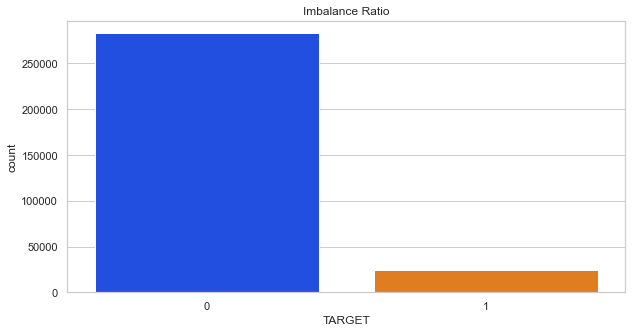

In [93]:
# Checking the imbalance ratio 

plt.figure(figsize = (10,5))
sns.countplot(x= appl_dat['TARGET'], data = appl_dat, palette = 'bright')
plt.title("Imbalance Ratio")
plt.show()

<font color='blue'/>**Analysis** : There is imbalance in Target column categories (1 - 'DEFAULTER'  representation is 8.07%  ,  0 - 'NON-DEFAULTER'  representation is 91.92% )

#### Creating functions to automate Count/Pie/Bar plots 

In [94]:
def uni_countplot(column):
    plt.figure(figsize = [11,4])
    
    plt.subplot(1,2,1)
    pltname = column + '  -  ' + 'NON-DEFAULTER'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt0, order = sorted(appl_dat_tgt0[column].unique(), reverse = True) , palette = "bright")
    plt.xticks(rotation = 90)
    
    plt.subplot(1,2,2)
    pltname = column + '  -  '+ 'DEFAULTER'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt1, order = sorted(appl_dat_tgt1[column].unique(), reverse = True), palette = "bright")
    plt.xticks(rotation = 90)

    plt.tight_layout()
    plt.show()

In [95]:
def uni_pieplot(column):
    plt.figure(figsize = [15,10])

    plt.subplot(1,2,1)
    pltname = column + '  -  ' + 'NON-DEFAULTER'
    plt.title(pltname, size =10)
    appl_dat_tgt0[column].value_counts().plot.pie(autopct='%1.1f%%', colors =['blue', 'orange', 'red', 'green','cyan','purple','black','yellow'] , labeldistance=None)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
    
    plt.subplot(1,2,2)
    pltname = column + '  -  '+ 'DEFAULTER'
    plt.title(pltname, size =10)
    appl_dat_tgt1[column].value_counts().plot.pie(autopct='%1.1f%%',colors =['blue', 'orange', 'red', 'green','cyan','purple','black','yellow'] , labeldistance=None)
    
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)     
    plt.tight_layout()
    plt.show()


In [96]:
def uni_barplot(column):
    plt.figure(figsize = [10,4])

    plt.subplot(1,2,1)
    (appl_dat_tgt0[column].value_counts(normalize=True)*100).plot.bar(title = column + "NON-DEFAULTER", color=['blue', 'orange', 'red', 'green' ])
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    (appl_dat_tgt1[column].value_counts(normalize=True)*100).plot.bar(title = column + "DEFAULTER", color=['blue', 'orange', 'red', 'green'])
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

In [97]:
def uni_countbarplot(column):
    plt.figure(figsize = [13,4])
    
    plt.subplot(1,3,1)
    pltname = column + '  -  ' + 'NON-DEFAULTER'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt0, order = sorted(appl_dat_tgt0[column].unique(), reverse = True) , palette = "bright")
    #plt.xticks(rotation = 90)
    
    plt.subplot(1,3,2)
    pltname = column + '  -  '+ 'DEFAULTER'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt1, order = sorted(appl_dat_tgt1[column].unique(), reverse = True), palette = "bright")
    #plt.xticks(rotation = 90)

    plt.subplot(1,3,3)
    (appl_dat_tgt1[column].value_counts(normalize=True)*100).plot.bar(title = column + "DEFAULTER", color=[ 'orange','blue', 'red', 'green'])
    plt.xticks(rotation=45)
    
    
    plt.tight_layout()
    plt.show()

In [98]:
def uni_countpieplot(column):
    plt.figure(figsize = [11,4])
    
    plt.subplot(1,3,1)
    pltname = column + '  -  ' + 'NON-DEFAULTER'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt0, order = sorted(appl_dat_tgt0[column].unique(), reverse = True) , palette = "bright")
    #plt.xticks(rotation = 90)
    
    plt.subplot(1,3,2)
    pltname = column + '  -  '+ 'DEFAULTER'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt1, order = sorted(appl_dat_tgt1[column].unique(), reverse = True), palette = "bright")
    #plt.xticks(rotation = 90)

    plt.subplot(1,3,3)
    pltname = column + '  -  '+ 'DEFAULTER'
    plt.title(pltname, size =10)
    appl_dat_tgt1[column].value_counts().plot.pie(autopct='%1.1f%%',colors =["orange","cyan","blue",'green'] , labeldistance=None)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
    
    plt.tight_layout()
    plt.show()

#### Categorical Variables Analysis - Segmented Univariate Analysis

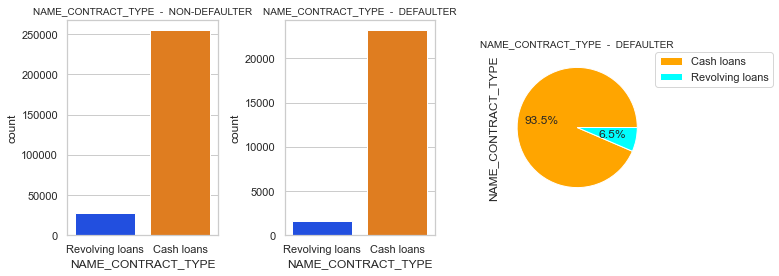

In [99]:
uni_countpieplot('NAME_CONTRACT_TYPE')

<font color='blue'/>**Analysis** :Revolving loans are justover 5%  from the total number of loans; NAME_CONTRACT_TYPE column does not provide any conclusive evidence  to identify DEFAULTER OR NON-DEFAULTER

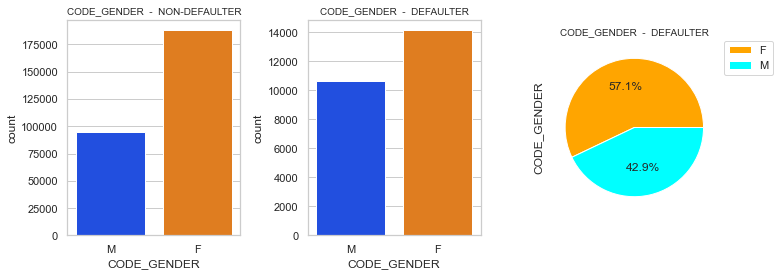

In [100]:
uni_countpieplot('CODE_GENDER')

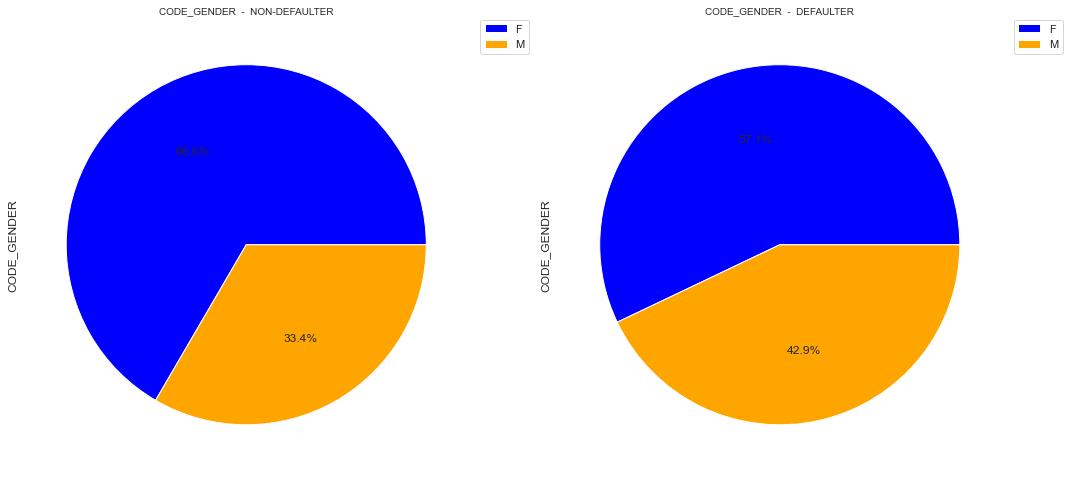

In [101]:
uni_pieplot('CODE_GENDER')

<font color='blue'/>**Analysis** :The number of female applicants are almost double the number of male applicants. Based on defaulted credits, males have a higher chance of not returning their loans, comparing with women- inference is not conclusive 

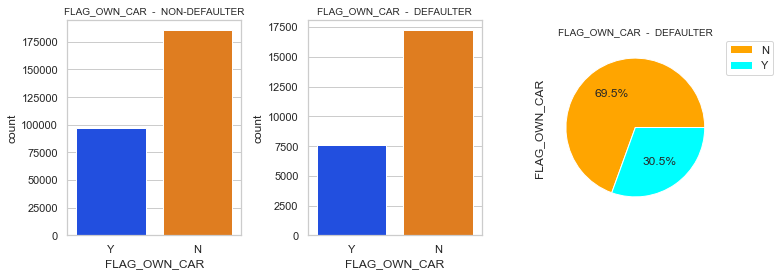

In [102]:
uni_countpieplot('FLAG_OWN_CAR')

<font color='blue'/>**Analysis** :50% of total applicants own a car. Car owner/non-owner relation does not provide any conclusive evidence  to identify DEFAULTER OR NON-DEFAULTER

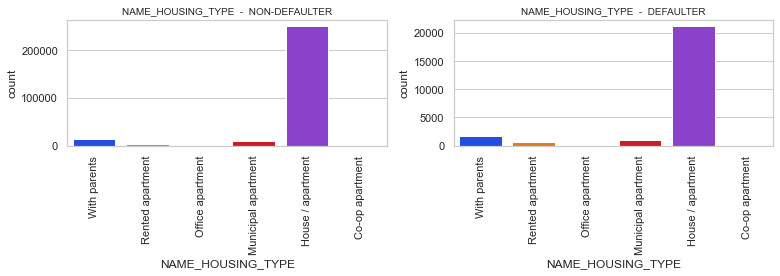

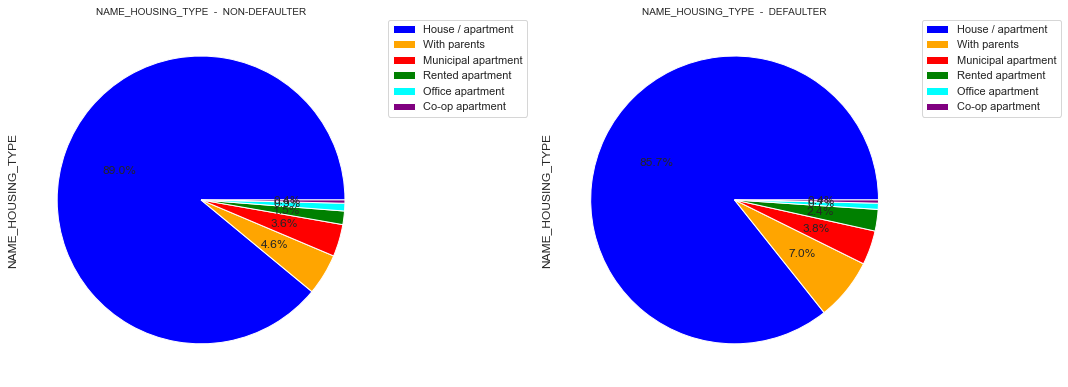

In [103]:
uni_countplot('NAME_HOUSING_TYPE')
uni_pieplot('NAME_HOUSING_TYPE')

<font color='blue'/>**Analysis** :Majority of people live in House/apartment
People living in office apartments have lowest default
People living with parents and living in rented apartments have higher probability of defaulting

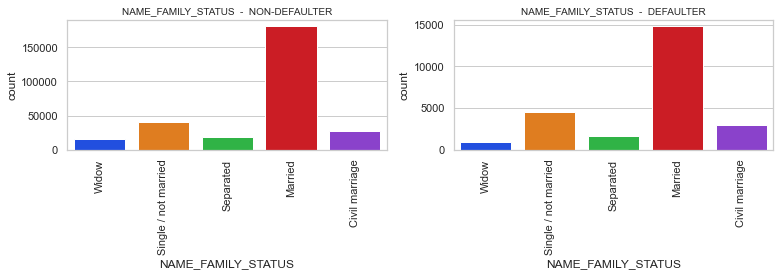

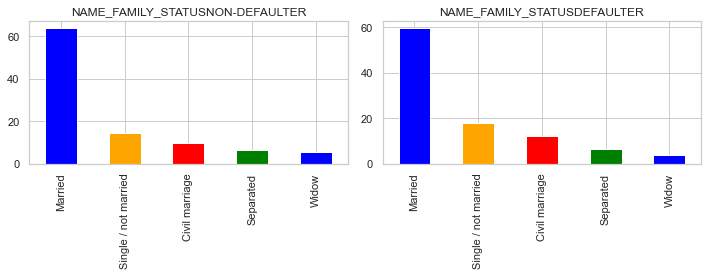

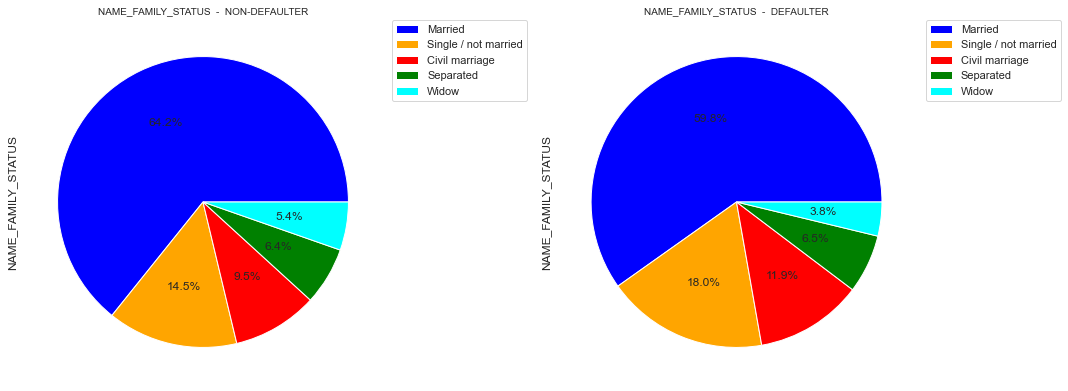

In [104]:
uni_countplot('NAME_FAMILY_STATUS')
uni_barplot('NAME_FAMILY_STATUS')
uni_pieplot('NAME_FAMILY_STATUS')

<font color='blue'/>**Analysis** :Applicants  who are 'Married' OR 'Widow' do on-time payments better comparatively.Applicants who are 'Single/not married' have more defaulting tendency comparatively. Both observations show weak correlation.

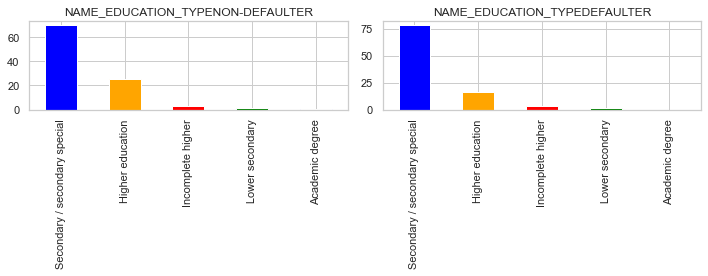

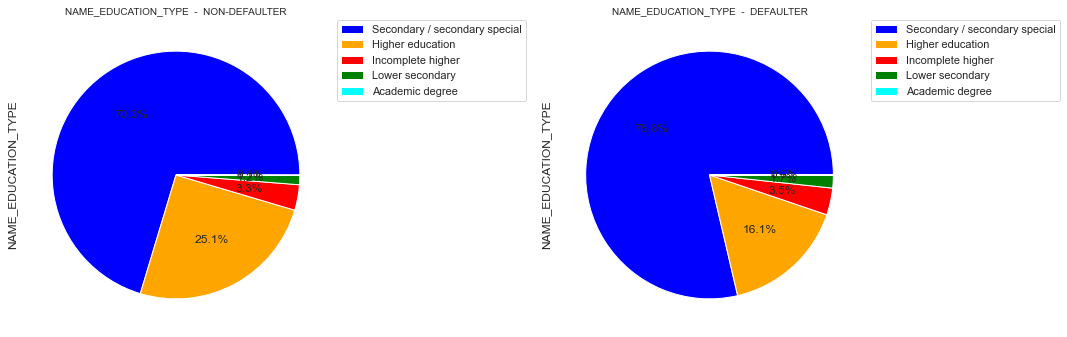

In [105]:
uni_barplot('NAME_EDUCATION_TYPE')
uni_pieplot('NAME_EDUCATION_TYPE')

<font color='blue'/>**Analysis** :Applicants with 'Higher education' are less defaulter and those with Lower secondary education have more tendency to default. This is a weak correlation

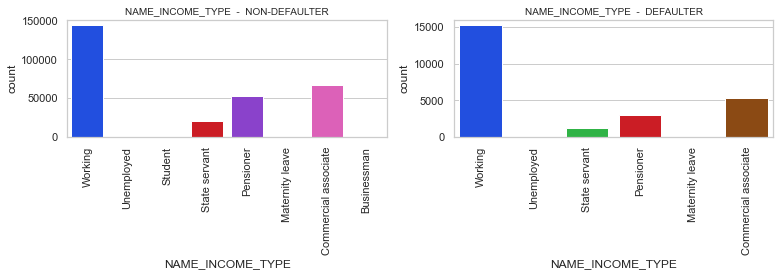

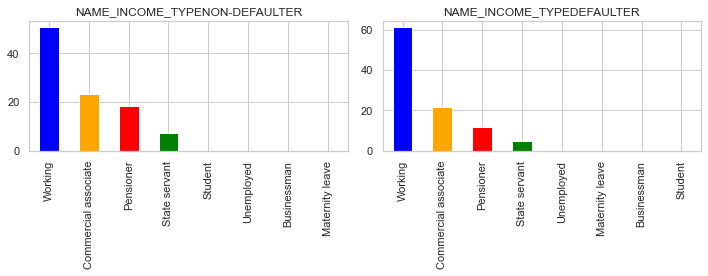

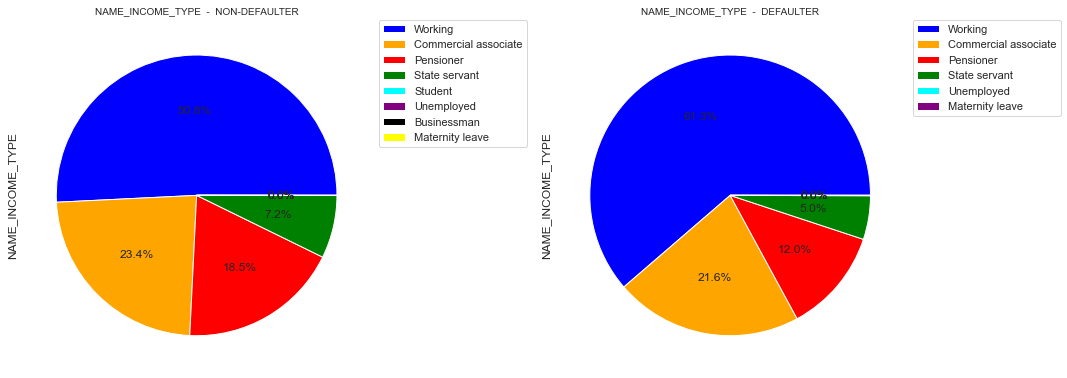

In [106]:
uni_countplot('NAME_INCOME_TYPE')
uni_barplot('NAME_INCOME_TYPE')
uni_pieplot('NAME_INCOME_TYPE')

In [107]:
appl_dat_tgt0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending = False)

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

<font color='blue'/>**Analysis** :Pensioners comparatively are non-defaulter 
Students and Businessmen have 18 & 10 observations and should be treated as a weak correlation

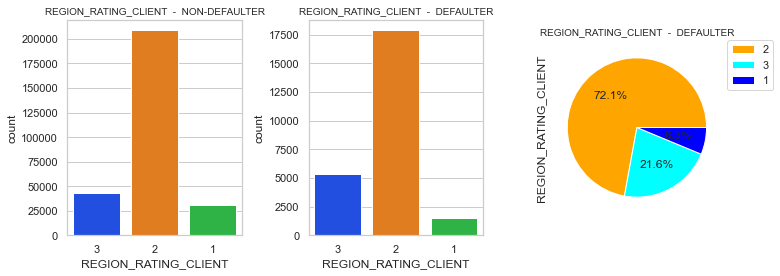

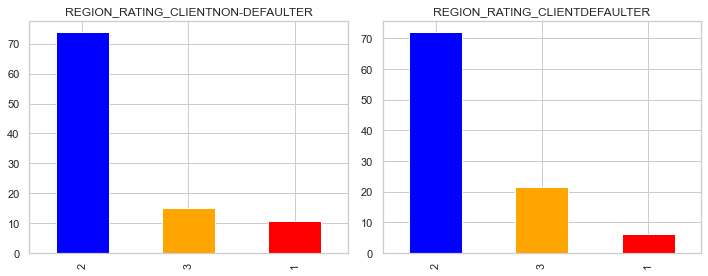

In [108]:
uni_countpieplot('REGION_RATING_CLIENT')
uni_barplot('REGION_RATING_CLIENT')

<font color='blue'/>**Analysis** :Most of the applicants are living in Region_Rating 2 place.
Region Rating 3 has the highest default rate.
Applicant living in Region_Rating 1 has the lowest probability of defaulting.

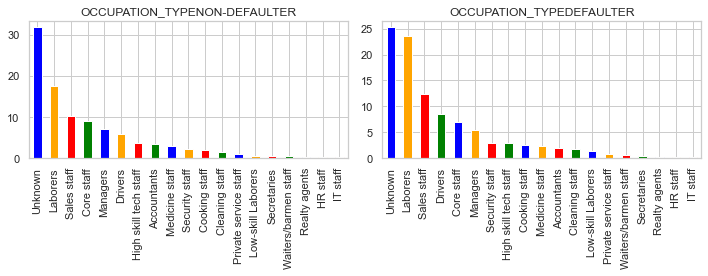

In [109]:
uni_barplot("OCCUPATION_TYPE")

<font color='blue'/>**Analysis** :Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
The category with highest defaulter are Laborers 

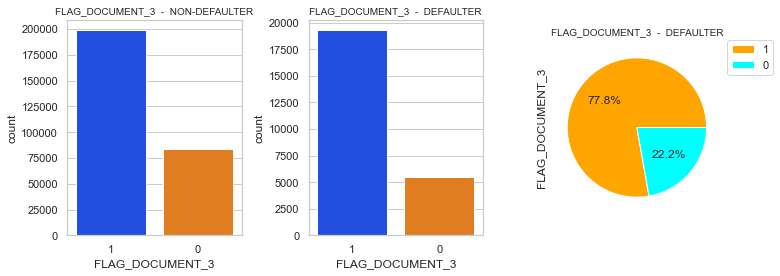

In [110]:
uni_countpieplot("FLAG_DOCUMENT_3")

<font color='blue'/>**Analysis** :There is no significant correlation between non-defaulters and defaulters who has submitted flag_document_3 

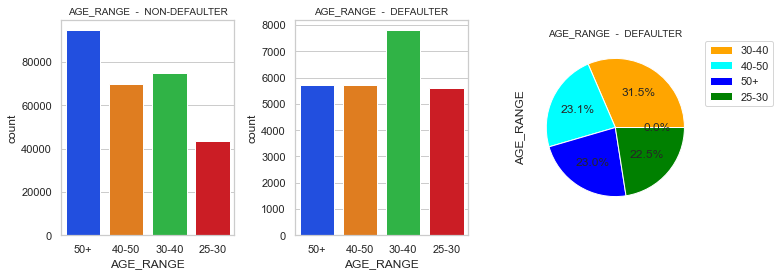

In [111]:
uni_countpieplot('AGE_RANGE')

<font color='blue'/>**Analysis** :People in the age group range 25-40 have higher probability of defaulting
People above age of 50 have low probability of defaulting

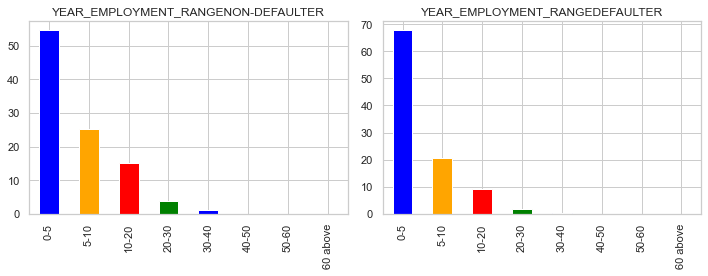

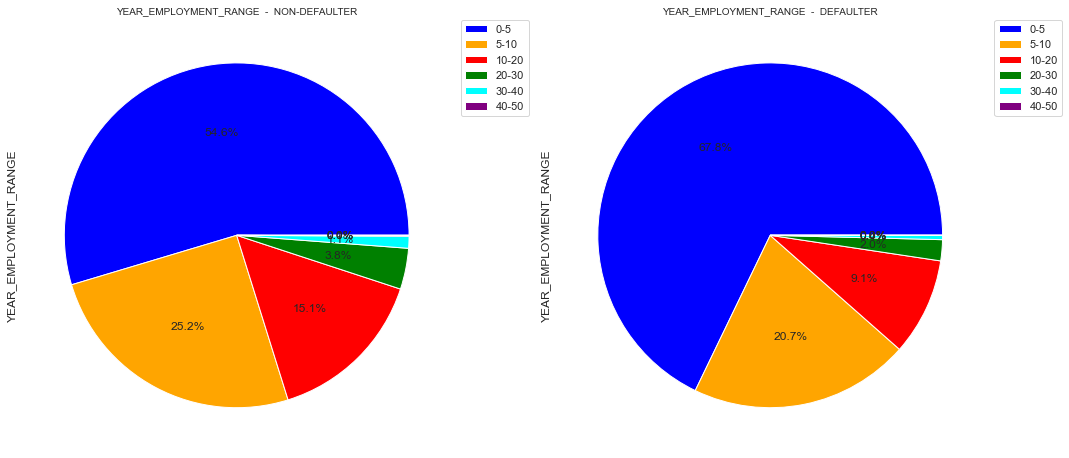

In [112]:
uni_barplot('YEAR_EMPLOYMENT_RANGE')
uni_pieplot('YEAR_EMPLOYMENT_RANGE')

<font color='blue'/>**Analysis** :Majority of the applicants have been employeed in between 0-5 years. Defaulter representation of this group is also the highest.
With increase of employment years, defaulting rate is gradually decreasing 

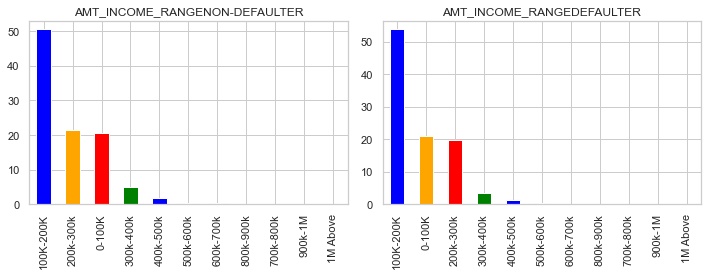

In [113]:
uni_barplot('AMT_INCOME_RANGE')

In [114]:
# checking for income range count in column 'AMT_INCOME_RANGE'
appl_dat_tgt0['AMT_INCOME_RANGE'].value_counts().sort_values(ascending = False)

100K-200K    142572
200k-300k     60255
0-100K        58473
300k-400k     13791
400k-500k      5039
500k-600k      1026
600k-700k       827
800k-900k       281
700k-800k       159
900k-1M          26
1M Above         17
Name: AMT_INCOME_RANGE, dtype: int64

<font color='blue'/>**Analysis** :90% of the applications have Income total less than 300,000
Application with Income less than 300,000 has high probability of defaulting
Applicant with Income more than 700,000 are less likely to default

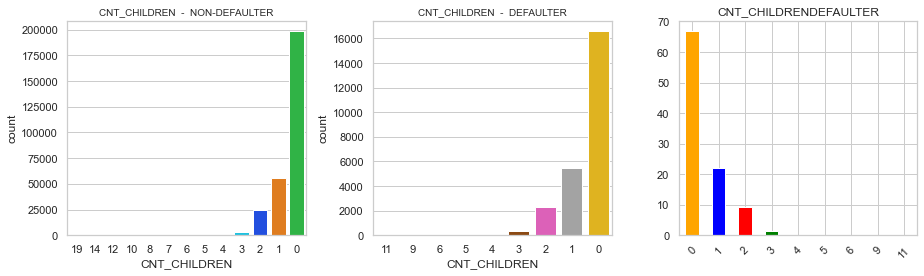

In [115]:
uni_countbarplot('CNT_CHILDREN')

<font color='blue'/>**Analysis** :Most of the applicants do not have children
Few applicants have more than 3 children.

### Correlation analysis of numerical variables

In [116]:
# filtering numerical data
appl_dat_tgt1.select_dtypes(include=["int64","float64"]).shape

(24825, 29)

In [117]:
# creating a dataframe  with correlation coefficeints 
corr_tgt1 = appl_dat_tgt1.select_dtypes(include=["int64","float64"]).corr()

In [118]:
# checking first 5 rows 
corr_tgt1.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR      AGE  YEARS_EMPLOYED
SK_ID_CURR           1.00000     NaN      -0.00514          -0.01017    -0.00129     -0.00758         -0.00181                     0.00630     0.00125       -0.00516           -0.00634          0.00254         -0.00382                  0.00500                    -0.00425                  -0.00942                  -0.00557                  -0.00909                  -0.00944                -0.00246         -0.00464                    -0.01111                   -0.00739                    -0.00308                    0.00518                   -0.00161                     0.00684  0.00130        -0.00517
TARGET                   NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN      NaN             NaN
CNT_CHILDREN        -0.00514     NaN       1.00000           0.00480    -0.00167      0.03126         -0.00811                    -0.03197    -0.25911       -0.19286           -0.14915          0.03230          0.88548                 -0.02390                    -0.02432                   0.02591                   0.00152                   0.02528                  -0.00504                -0.01155          0.06056                     0.00032                   -0.01126                    -0.00932                   -0.00885                   -0.01303                    -0.02725 -0.25891        -0.19286
AMT_INCOME_TOTAL    -0.01017     NaN       0.00480           1.00000     0.03813      0.04642          0.03759                     0.00913    -0.00310       -0.01498           -0.00016          0.00421          0.00665                  0.01377                     0.00758                  -0.00468                  -0.00517                  -0.00459                  -0.00485                 0.00243          0.00145                     0.00108                    0.00014                     0.00094                    0.00572                    0.00104                     0.00452 -0.00287        -0.01497
AMT_CREDIT          -0.00129     NaN      -0.00167           0.03813     1.00000      0.75219          0.98278                     0.06916     0.13532        0.00193            0.02585          0.05233          0.05122                  0.03178                     0.01954                   0.01986                  -0.02550                   0.02024                  -0.03046                 0.11085          0.06163                    -0.00377                    0.00435                     0.01060                    0.05623                   -0.00720                    -0.02070  0.13532         0.00193

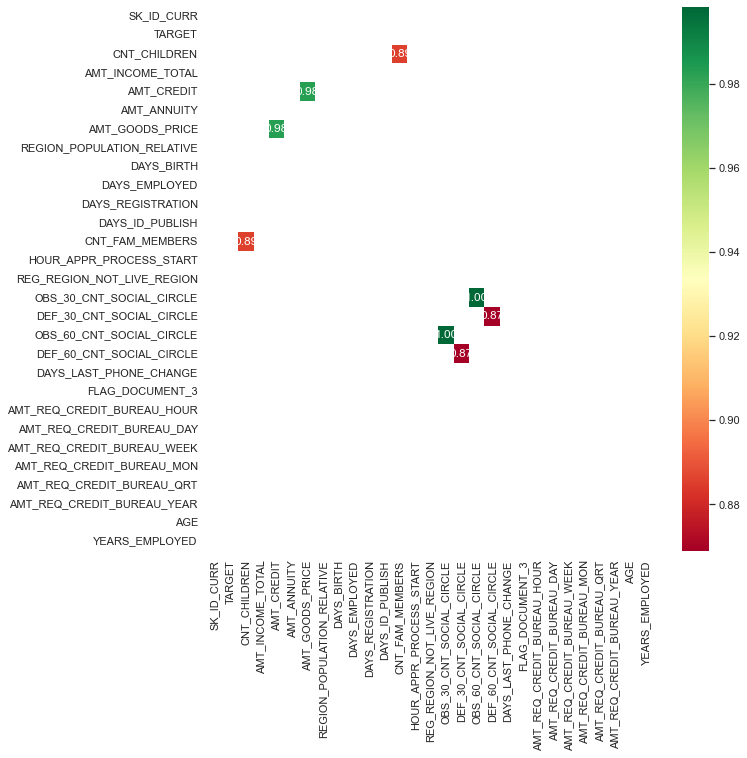

In [119]:
# Creating a HeatMap to view the correlations above 80% and 99.99%
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_tgt1[(corr_tgt1 >= 0.8) & (corr_tgt1 < 0.999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [120]:
# getting top ten correlation coefficients on defaulter in TARGET column
corr_tgt1[corr_tgt1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                AMT_GOODS_PRICE            0.98278
AMT_GOODS_PRICE           AMT_CREDIT                 0.98278
CNT_CHILDREN              CNT_FAM_MEMBERS            0.88548
CNT_FAM_MEMBERS           CNT_CHILDREN               0.88548
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE   0.86902
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE   0.86902
AMT_ANNUITY               AMT_GOODS_PRICE            0.75230
AMT_GOODS_PRICE           AMT_ANNUITY                0.75230
AMT_ANNUITY               AMT_CREDIT                 0.75219
AMT_CREDIT                AMT_ANNUITY                0.75219
DAYS_BIRTH                DAYS_EMPLOYED              0.58219
DAYS_EMPLOYED             DAYS_BIRTH                 0.58219
YEARS_EMPLOYED            DAYS_BIRTH                 0.58218
DAYS_BIRTH                YEARS_EMPLOYED             0.58218
DAYS_EMPLOYED             AGE                        0.58177
AGE                       DAYS_EMPLOYED              0.58177
                        

As we have duplicate combinations, looking at the above and removing dups, we get top 10 correlations as:

AMT_CREDIT                AMT_GOODS_PRICE             0.982783
CNT_CHILDREN              CNT_FAM_MEMBERS             0.885484
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.869016
AMT_ANNUITY               AMT_GOODS_PRICE             0.752295
AMT_ANNUITY               AMT_CREDIT                  0.752195
DAYS_BIRTH                DAYS_EMPLOYED               0.582185
YEARS_EMPLOYED            DAYS_BIRTH                  0.582182
DAYS_EMPLOYED             AGE                         0.581769                   
YEARS_EMPLOYED            AGE                         0.581765
DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.337389

In [121]:
# dataframe with numerical datatypes for non-defaulter in TARGET column
appl_dat_tgt0.select_dtypes(include=["int64","float64"]).shape

(282686, 29)

In [122]:
# Dataframe with correlation coefficients 
corr_tgt0 = appl_dat_tgt0.select_dtypes(include=["int64","float64"]).corr()

In [123]:
# checking top five rows 
corr_tgt0.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR      AGE  YEARS_EMPLOYED
SK_ID_CURR           1.00000     NaN      -0.00072           0.00174    -0.00034      0.00007         -0.00023                     0.00036     0.00135        0.00174            0.00148          0.00008         -0.00279                 -0.00011                     0.00010                  -0.00070                   0.00055                  -0.00074                   0.00238                 0.00100         -0.00322                    -0.00177                   -0.00163                     0.00230                   -0.00004                    0.00096                     0.00385  0.00132         0.00174
TARGET                   NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN              NaN                      NaN                         NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN      NaN             NaN
CNT_CHILDREN        -0.00072     NaN       1.00000           0.02740     0.00308      0.02091         -0.00056                    -0.02436    -0.33697       -0.24517           -0.18579          0.02875          0.87857                 -0.00524                    -0.01234                   0.01453                  -0.00219                   0.01420                  -0.00213                 0.00850          0.05572                     0.00015                    0.00106                    -0.00032                   -0.00764                   -0.00422                    -0.03586 -0.33685        -0.24517
AMT_INCOME_TOTAL     0.00174     NaN       0.02740           1.00000     0.34280      0.41895          0.34943                     0.16785    -0.06261       -0.14039           -0.06494         -0.02290          0.03425                  0.07674                     0.06851                  -0.02865                  -0.02800                  -0.02851                  -0.02790                 0.04134         -0.03925                     0.00271                    0.00803                     0.00865                    0.05868                    0.01768                     0.03438 -0.06260        -0.14039
AMT_CREDIT          -0.00034     NaN       0.00308           0.34280     1.00000      0.77130          0.98702                     0.10060     0.04738       -0.07010           -0.01348          0.00146          0.06454                  0.05362                     0.02462                  -0.00020                  -0.01943                  -0.00018                  -0.02186                 0.06954          0.10033                    -0.00227                    0.00514                     0.00094                    0.05506                    0.02182                    -0.03752  0.04743        -0.07010

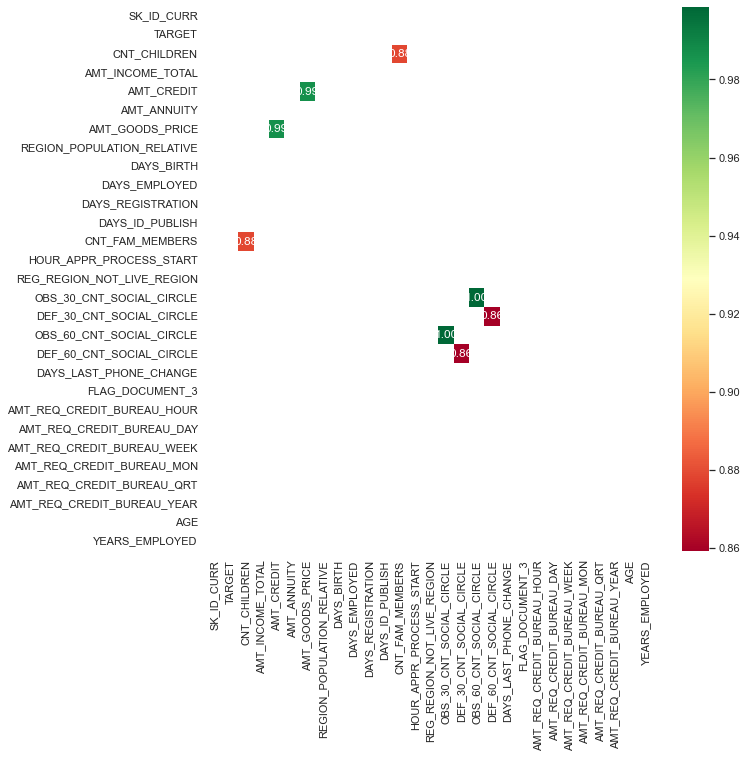

In [124]:
# Creating a HeatMap to view the correlations above 80% and 99.99%
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_tgt0[(corr_tgt0 >= 0.8) & (corr_tgt0 < 0.999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [125]:
# filtering on top 10 correation coefficients on non-defaulter in TARGET column
corr_tgt0[corr_tgt0 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_GOODS_PRICE           AMT_CREDIT                 0.98702
AMT_CREDIT                AMT_GOODS_PRICE            0.98702
CNT_CHILDREN              CNT_FAM_MEMBERS            0.87857
CNT_FAM_MEMBERS           CNT_CHILDREN               0.87857
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE   0.85937
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE   0.85937
AMT_ANNUITY               AMT_GOODS_PRICE            0.77642
AMT_GOODS_PRICE           AMT_ANNUITY                0.77642
AMT_ANNUITY               AMT_CREDIT                 0.77130
AMT_CREDIT                AMT_ANNUITY                0.77130
DAYS_EMPLOYED             DAYS_BIRTH                 0.62611
DAYS_BIRTH                DAYS_EMPLOYED              0.62611
                          YEARS_EMPLOYED             0.62611
YEARS_EMPLOYED            DAYS_BIRTH                 0.62611
DAYS_EMPLOYED             AGE                        0.62583
AGE                       DAYS_EMPLOYED              0.62583
                        

As we have duplicate combinations, looking at the above and removing dups, we get top 10 correlations as:
AMT_GOODS_PRICE           AMT_CREDIT                  0.987022
CNT_CHILDREN              CNT_FAM_MEMBERS             0.878571
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.859371
AMT_ANNUITY               AMT_GOODS_PRICE             0.776421
AMT_ANNUITY               AMT_CREDIT                  0.771297
DAYS_EMPLOYED             DAYS_BIRTH                  0.626114                      
YEARS_EMPLOYED            DAYS_BIRTH                  0.626112
DAYS_EMPLOYED             AGE                         0.625826                        
YEARS_EMPLOYED            AGE                         0.625824
AMT_ANNUITY               AMT_INCOME_TOTAL            0.418948

<font color='blue'/>**Analysis** :On comparing top 10 correlations between Defaulter and Non-Defaulter,
they are almost same with minor differences in percentage.
Top three correlations for both are same, 
a) AMT_CREDIT and AMT_GOODS_PRICE ,b) CNT_CHILDREN and CNT_FAM_MEMBERS  , c) DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE.  Highest correlation for Defaulter is 0.982 for AMT_CREDIT & AMT_GOODS_PRICE. Highest correlation for Non-Defaulter is 0.987 for AMT_CREDIT & AMT_GOODS_PRICE 

### Univariate analysis of numerical variables

In [126]:
# storing numerical variables in col
col=['CNT_CHILDREN','DAYS_EMPLOYED','AMT_GOODS_PRICE','AGE','AMT_CREDIT','AMT_INCOME_TOTAL'] 

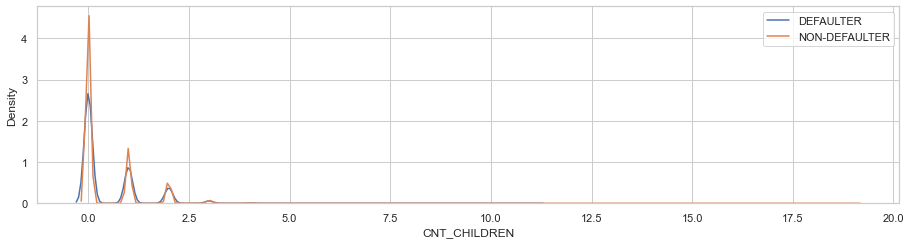

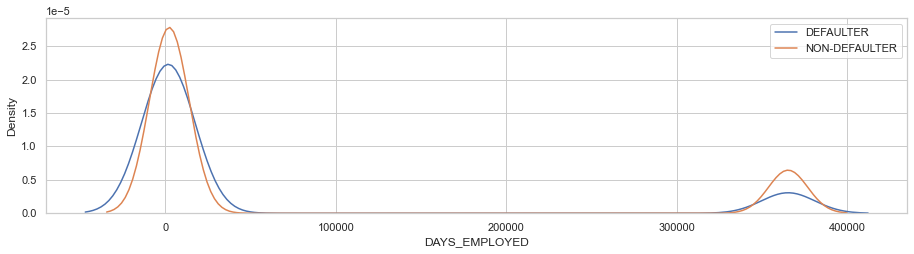

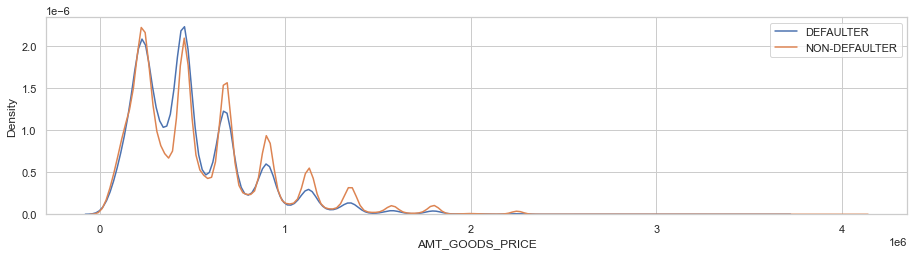

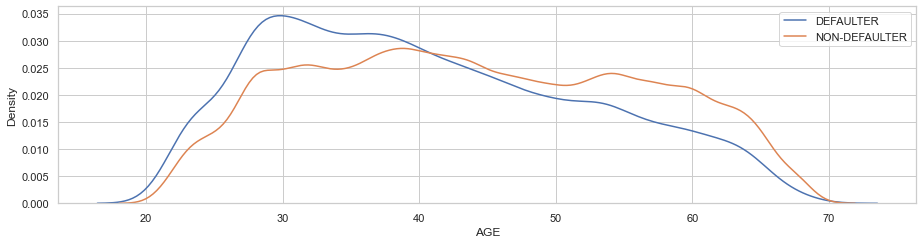

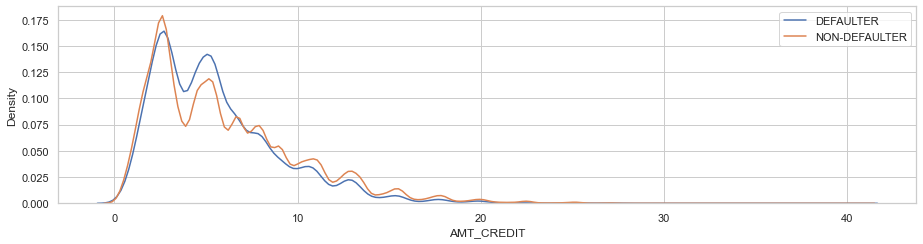

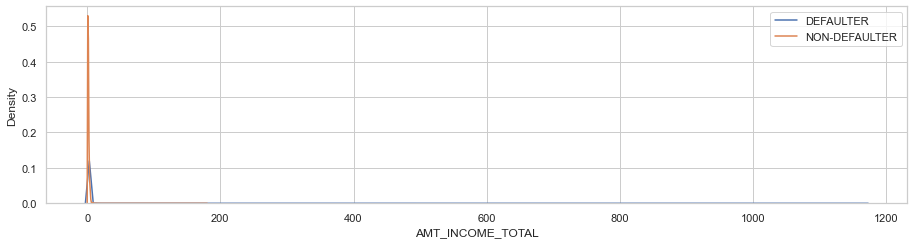

In [127]:
# Using for loop to plot distplot for TARGET variable categories 
a=6
b=2
c=1
for i in col:
    plt.figure(figsize = [25,20])
    plt.subplot(a,b,c)
    sns.distplot(appl_dat_tgt1[i], label ='DEFAULTER', hist=False)
    sns.distplot(appl_dat_tgt0[i],label ='NON-DEFAULTER', hist=False)
    plt.xlabel(i)

    c=c+1
    
    plt.legend()
    plt.tight_layout()
    plt.show()

<font color='blue'/>**Analysis** :1.a)  For AMT_CREDIT between ~ 2.5 & ~6.5 (lakhs), there are more applicants who are in defaulter. 1.b) For AMT_CREDIT > 7.5(lakhs) , there are more applicants who are in non defaulter
2.a) For AGE between 20 and 40, there are applicants  who are in defaulter.
2.b) For AGE > 40 , there are more applicants who are in non-defaulter.
3.a) For AMT_GOODS_PRICE between ~2.5 & ~5.5(lakhs), there are more applicants who are in defaulter.
3.b) For AMT_GOODS_PRICE There are also spikes on and off but they don't show any conclusive observations.
4.a) For DAYS_EMPLOYED there are outliers
5.a) For CNT_CHILDREN 0 (those with no children), there are lots of applicants who are in non-defaulter
5.b) For CNT_CHILDREN with 1 OR 2 (those with 1 or 2 children), there are few more applicants who are in non-defaulter
6.a) AMT_INCOME_TOTAL doesn't give any valid observations

## 4. Bivariate/Multivariate analysis

#### Continuous vs Continuous variables

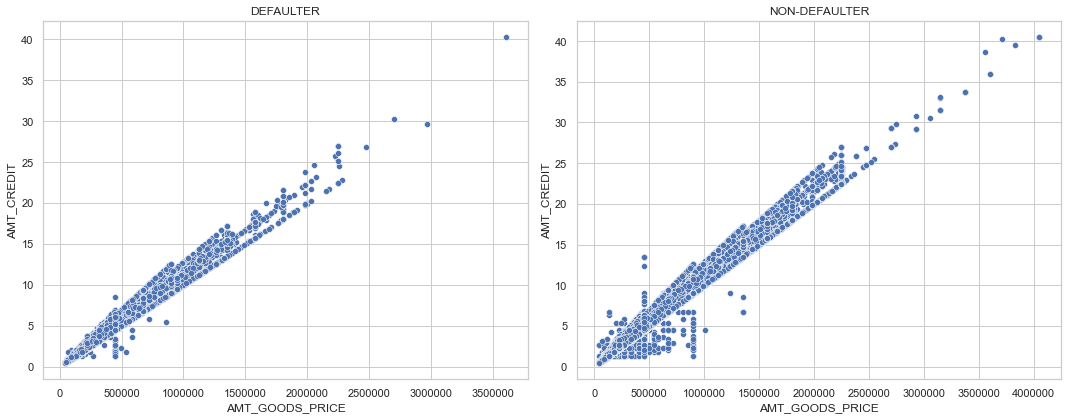

In [128]:
# Analysis of AMT_GOODS_PRICE V/S AMT_CREDIT using scatter plot 

plt.figure(figsize = [15,6])

plt.subplot(1,2,1)
plt.title('DEFAULTER')

sns.scatterplot(x = appl_dat_tgt1['AMT_GOODS_PRICE'], y = appl_dat_tgt1['AMT_CREDIT'], data = appl_dat_tgt1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('NON-DEFAULTER')
sns.scatterplot(x = appl_dat_tgt0['AMT_GOODS_PRICE'], y = appl_dat_tgt0['AMT_CREDIT'], data = appl_dat_tgt0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

<font color='blue'/>**Analysis** :There is a strong positive correlation between AMT_CREDIT  & AMT_GOODS_PRICE 

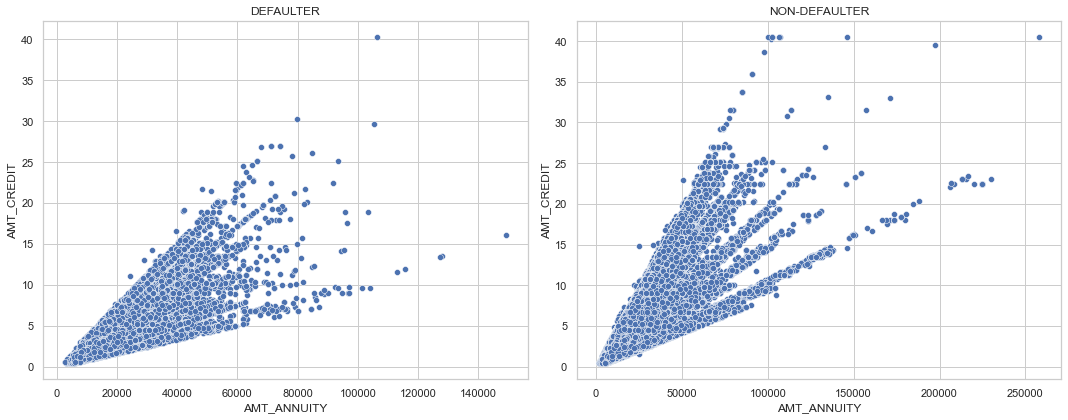

In [129]:
# Analysis of AMT_ANNUITY V/S AMT_CREDIT using scatter plot

plt.figure(figsize = [15,6])

plt.subplot(1,2,1)
plt.title('DEFAULTER')

sns.scatterplot(x = appl_dat_tgt1['AMT_ANNUITY'], y = appl_dat_tgt1['AMT_CREDIT'], data = appl_dat_tgt1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('NON-DEFAULTER')
sns.scatterplot(x = appl_dat_tgt0['AMT_ANNUITY'], y = appl_dat_tgt0['AMT_CREDIT'], data = appl_dat_tgt0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

<font color='blue'/>**Analysis** :There is a strong positive correlation between AMT_CREDIT  & AMT_ANNUITY

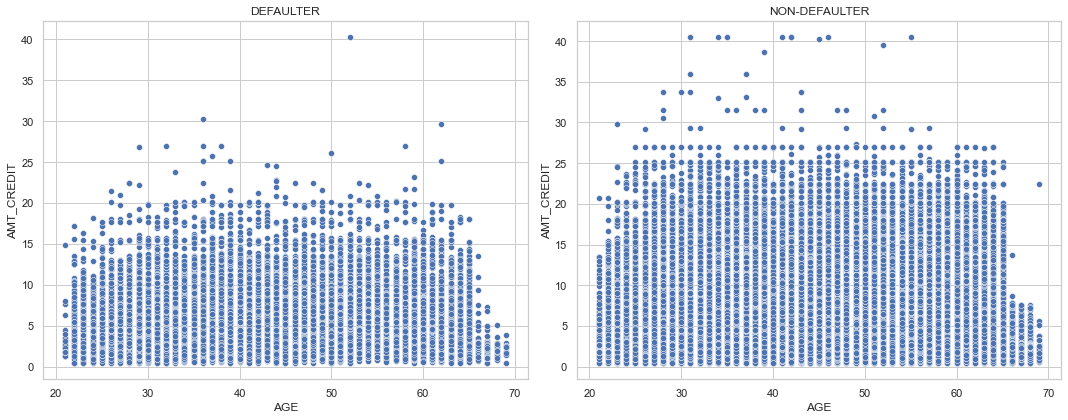

In [130]:
# Analysis of AMT_CREDIT V/S AGE using scatter plot

plt.figure(figsize = [15,6])

plt.subplot(1,2,1)
plt.title('DEFAULTER')

sns.scatterplot(x = appl_dat_tgt1['AGE'], y = appl_dat_tgt1['AMT_CREDIT'], data = appl_dat_tgt1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('NON-DEFAULTER')
sns.scatterplot(x = appl_dat_tgt0['AGE'], y = appl_dat_tgt0['AMT_CREDIT'], data = appl_dat_tgt0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

<font color='blue'/>**Analysis** :There is no correlation between AMT_CREDIT and AGE 

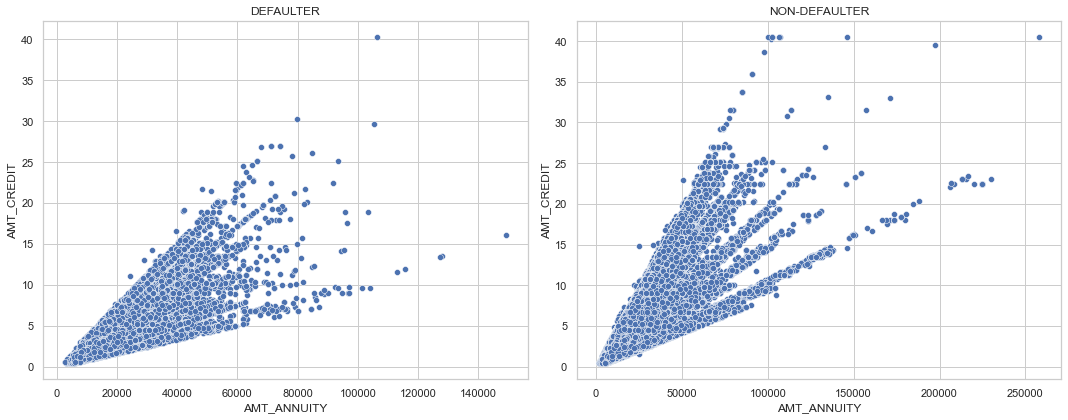

In [131]:
# Analysis of AMT_ANNUITY V/S AMT_GOODS_PRICE using scatter plot
plt.figure(figsize = [15,6])

plt.subplot(1,2,1)
plt.title('DEFAULTER')

sns.scatterplot(x = appl_dat_tgt1['AMT_ANNUITY'], y = appl_dat_tgt1['AMT_CREDIT'], data = appl_dat_tgt1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('NON-DEFAULTER')
sns.scatterplot(x = appl_dat_tgt0['AMT_ANNUITY'], y = appl_dat_tgt0['AMT_CREDIT'], data = appl_dat_tgt0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

<font color='blue'/>**Analysis** :There is positive correlation between AMT_ANNUITY and AMT_CREDIT

#### Continuous vs Categorical variables

In [132]:
# storing continous variables in col
col=['CNT_CHILDREN','AMT_GOODS_PRICE','AGE','AMT_CREDIT'] 

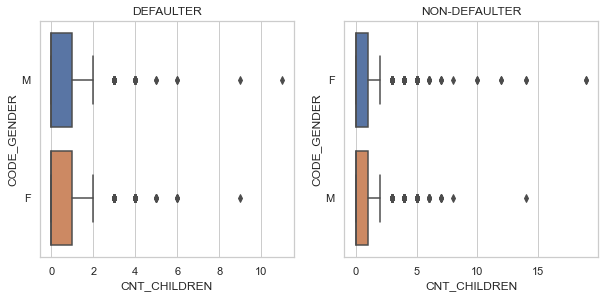

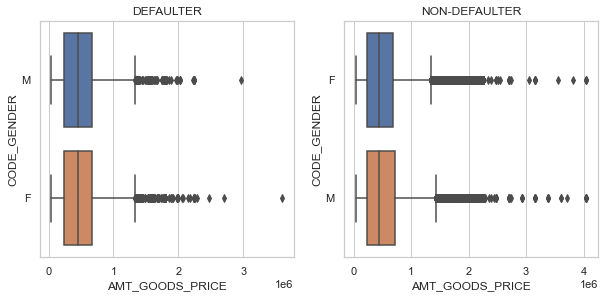

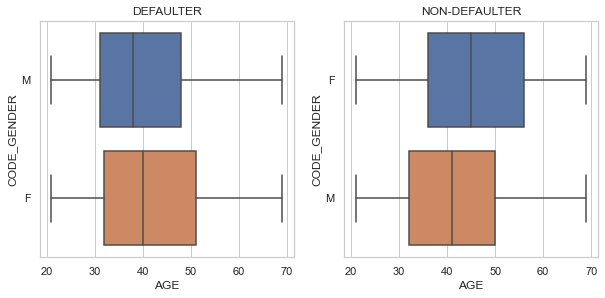

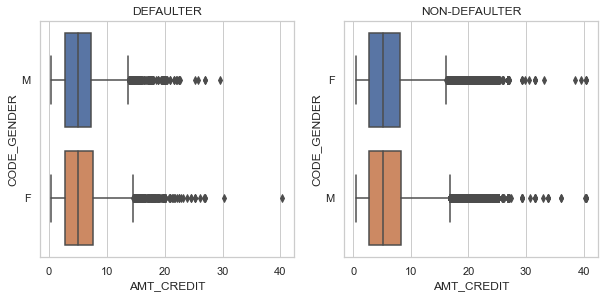

In [133]:
# Using for loop for plotting multiple boxplot 
a=4
b=2
c=1
for i in col:
    plt.figure(figsize = [10,20])
    plt.subplot(a,b,c)
    plt.title('DEFAULTER')
    sns.boxplot(appl_dat_tgt1[i], appl_dat_tgt1['CODE_GENDER'])
    c=c+1
    
    plt.subplot(a,b,c)
    plt.title('NON-DEFAULTER')
    sns.boxplot(appl_dat_tgt0[i],appl_dat_tgt0['CODE_GENDER'])
    plt.xlabel(i)
    c=c+1

    plt.show()

<font color='blue'/>**Analysis** : XNA : Incorrect entries observed in columns 'CNT_CHILDREN','AMT_GOODS_PRICE','AGE','AMT_CREDIT'

#### Continuous vs Categorical variables

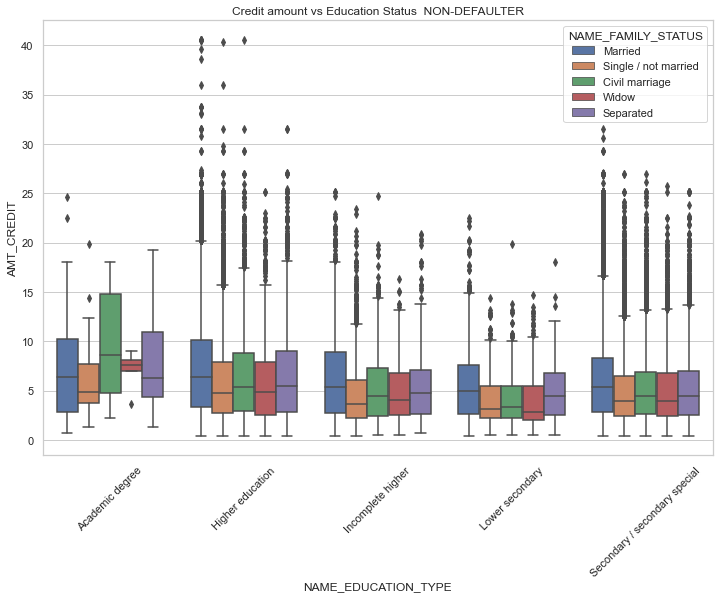

In [135]:
# Box plotting for Credit amount

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', data =appl_dat_tgt0,hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status'"  " 'NON-DEFAULTER')
plt.show()

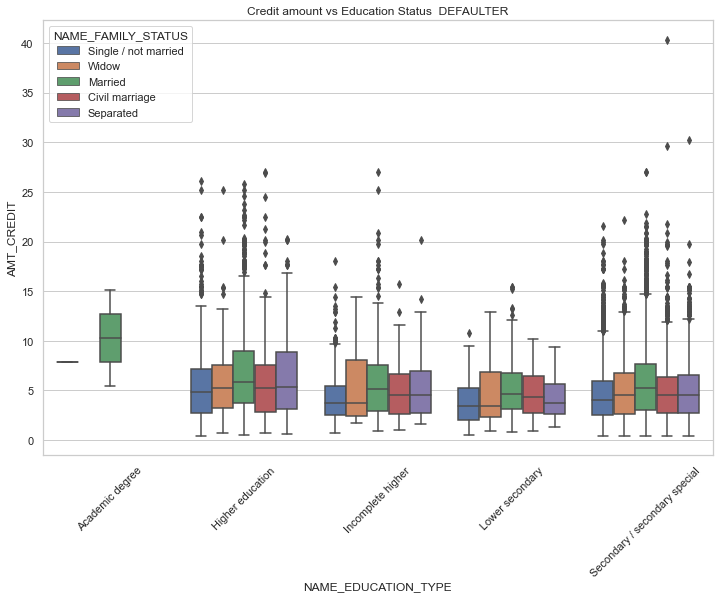

In [136]:
# Box plotting for Credit amount

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', data =appl_dat_tgt1,hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status'"  " 'DEFAULTER')
plt.show()

<font color='blue'/>**Analysis** :Family status of 'civil marriage', 'married' and 'separated' of Academic degree education have taken higher loan(AMT_CREDIT) than others. 

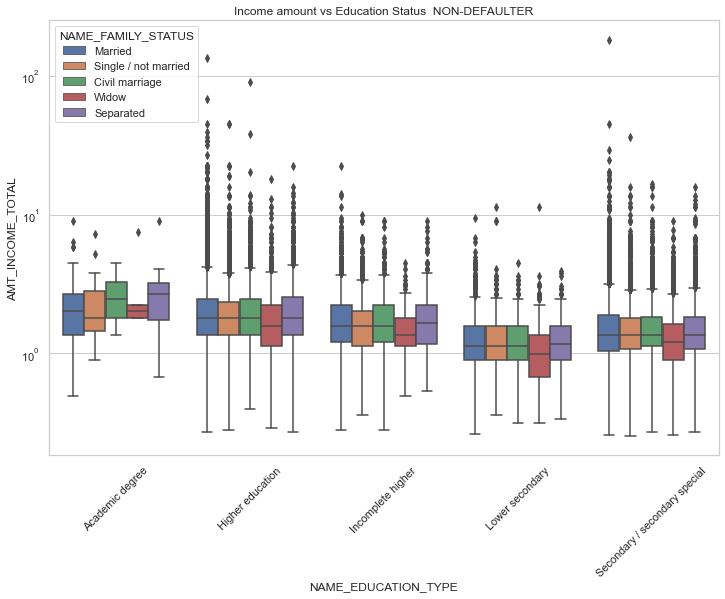

In [137]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot( x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', data = appl_dat_tgt0,hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status'"  " 'NON-DEFAULTER')
plt.show()

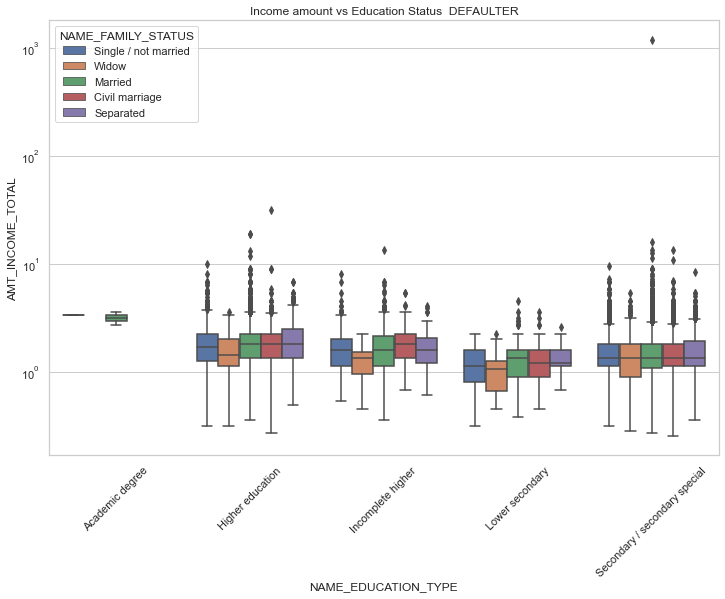

In [138]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot( x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', data = appl_dat_tgt1,hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status'"  " 'DEFAULTER')
plt.show()

<font color='blue'/>**Analysis** :Applicants with Academic degree have highest income among other categories in Education type.

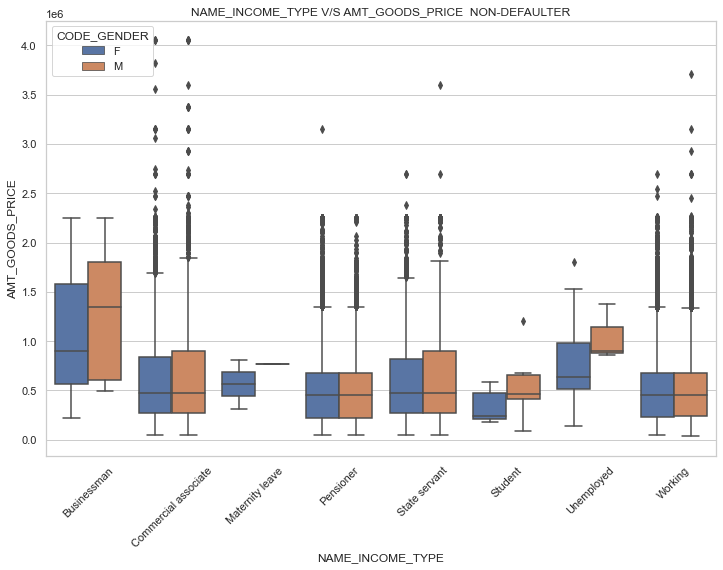

In [139]:
# Analysis of NAME_INCOME_TYPE V/S AMT_GOODS_PRICE V/S CODE_GENDER
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE', data =appl_dat_tgt0,hue ='CODE_GENDER',orient='v')
plt.title('NAME_INCOME_TYPE V/S AMT_GOODS_PRICE'"  " 'NON-DEFAULTER')
plt.show()

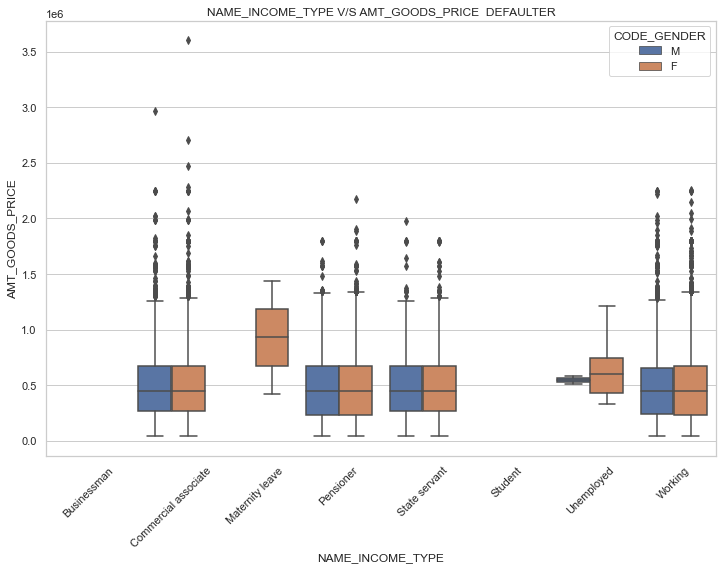

In [140]:
# Analysis of NAME_INCOME_TYPE V/S AMT_GOODS_PRICE V/S CODE_GENDER
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_GOODS_PRICE', data =appl_dat_tgt1,hue ='CODE_GENDER',orient='v')
plt.title('NAME_INCOME_TYPE V/S AMT_GOODS_PRICE'"  " 'DEFAULTER')
plt.show()

<font color='blue'/>**Analysis** :Applicants who are Unemployed and Male have a very high price of goods in NON-DEFAULTER  than DEFAULTER. 
Applicants who are Student/Businessman and either Male OR Female are NON-DEFAULTER. They are completely missing from DEFAULTER category.

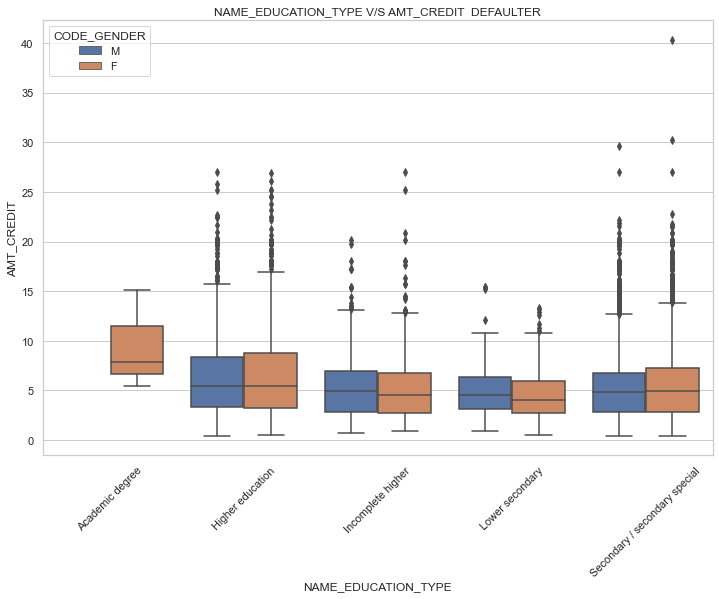

In [141]:
# Analysis of NAME_EDUCATION_TYPE V/S AMT_CREDIT V/S CODE_GENDER
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', data =appl_dat_tgt1,hue ='CODE_GENDER',orient='v')
plt.title('NAME_EDUCATION_TYPE V/S AMT_CREDIT'"  " 'DEFAULTER')
plt.show()

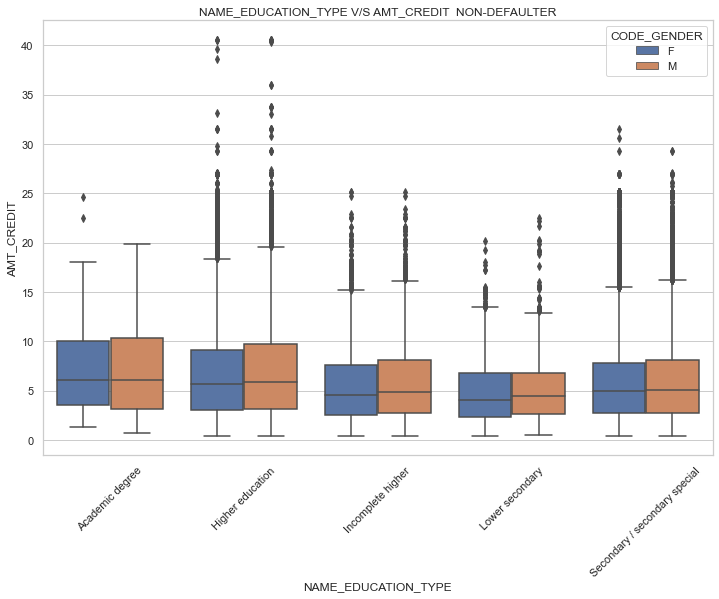

In [142]:
# Analysis of NAME_EDUCATION_TYPE V/S AMT_CREDIT V/S CODE_GENDER
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', data =appl_dat_tgt0,hue ='CODE_GENDER',orient='v')
plt.title('NAME_EDUCATION_TYPE V/S AMT_CREDIT'"  " 'NON-DEFAULTER')
plt.show()

<font color='blue'/>**Analysis** :Male clients with Academic Degree are non-defaulters

### Categorical V/S Categorical variables

In [143]:
# creating function to automate plots 

def bi_countplot(column,hue_column):
    plt.figure(figsize = [20,8])
    color = sns.color_palette("bright")
    
    plt.subplot(1,2,1)
    pltname = 'NON-DEFAULTER Applicants'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt0, order = sorted(appl_dat_tgt0[column].unique(), reverse = True) , palette = color,
                  hue = hue_column, hue_order = sorted(appl_dat_tgt0[hue_column].unique(), reverse = True))
    plt.xticks(rotation = 90)
    
    plt.subplot(1,2,2)
    pltname = 'DEFAULTER Applicants'
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_dat_tgt1, order = sorted(appl_dat_tgt1[column].unique(), reverse = True), palette = color,
                  hue = hue_column, hue_order = sorted(appl_dat_tgt1[hue_column].unique(), reverse = True))
    plt.xticks(rotation = 90)

    plt.tight_layout()
    plt.show()

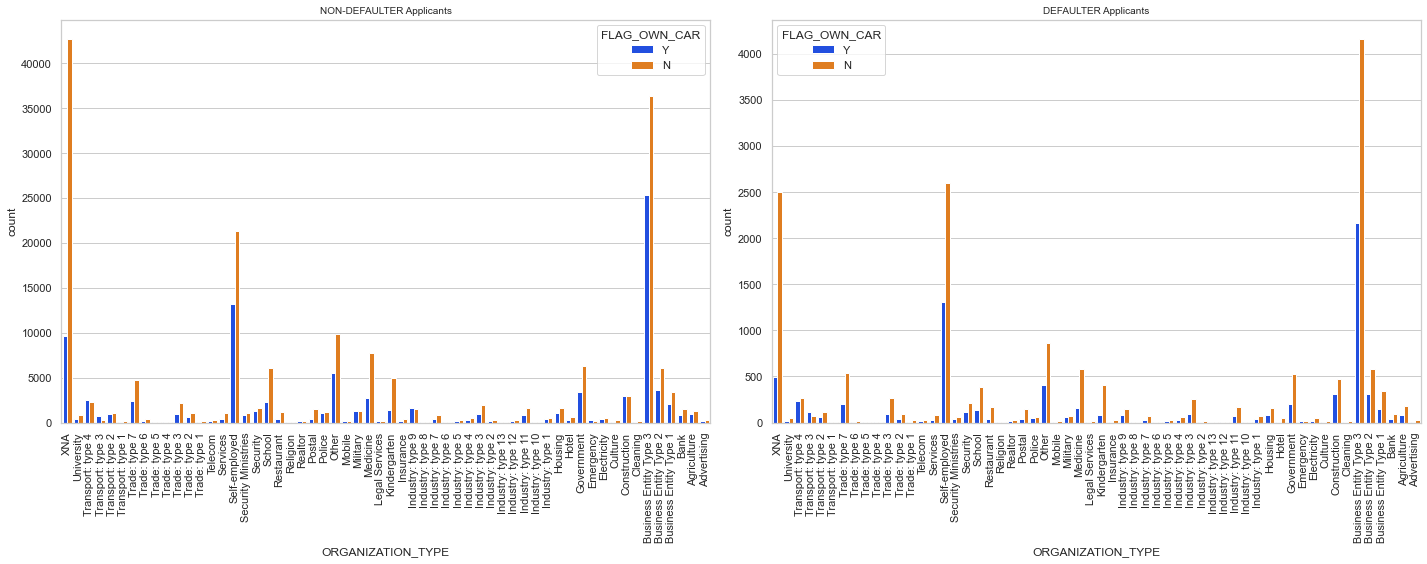

In [144]:
bi_countplot('ORGANIZATION_TYPE','FLAG_OWN_CAR')

<font color='blue'/>**Analysis** :Applicants who are Self-employed and don't own Car have more defaulter compared to non-defaulter 

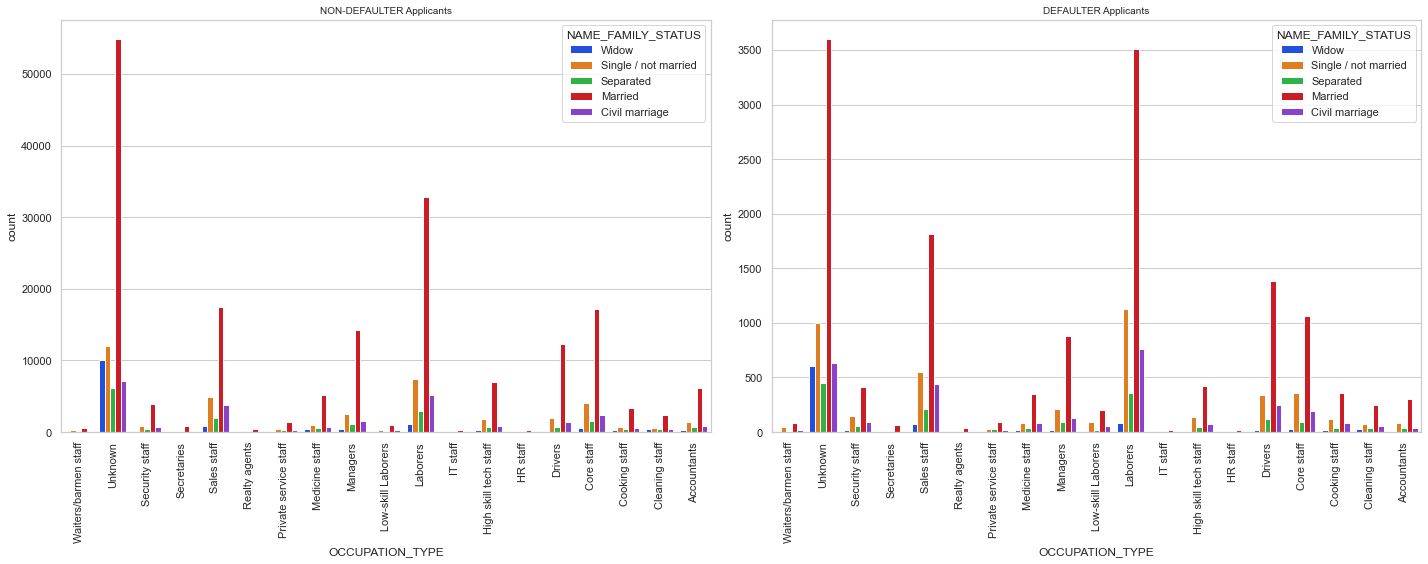

In [145]:
bi_countplot('OCCUPATION_TYPE','NAME_FAMILY_STATUS')

<font color='blue'/>**Analysis** :Married and Accountants have better payment. 
Single(not married) & Married  Laborers are more likely to default (DEFAULTER) compared to NON-DEFAULTER 

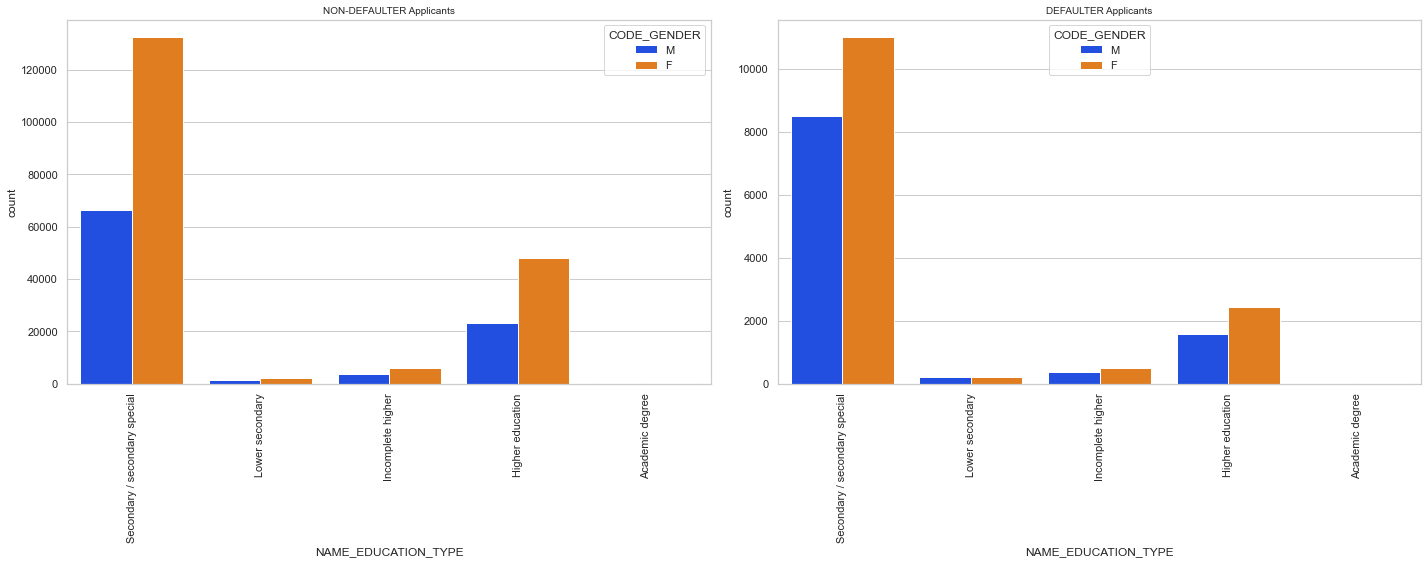

In [146]:
bi_countplot('NAME_EDUCATION_TYPE','CODE_GENDER')

<font color='blue'/>**Analysis**: Male applicants with Secondary/Secondary special education are more DEFAULTER compared to NON-DEFAULTER
Female applicants with Higher education are more NON DEFAULTER compared to DEFAULTER

## 5. Merged Dataframes Analysis


In [147]:
# merging  both the dataframe on SK_ID_CURR with Inner Joins
appl_merge = pd.merge(appl_dat, prev_appl, how='inner', on='SK_ID_CURR')
appl_merge.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  \
0      100002       1           Cash loans           M            N               Y             0           2.02500       4.06597    24700.50000       351000.00000   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                     0.01880        9461            637         3648.00000             2120        Laborers          1.00000                    2                           2                    WEDNESDAY                         10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                   2.00000                   2.00000                   2.00000                   2.00000              1134.00000                1                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     1.00000   26   
1      100003       0           Cash loans           F            N               N             0           2.70000      12.93502    35698.50000      1129500.00000          Family    State servant               Higher education               Married  House / apartment                     0.00354       16765           1188         1186.00000              291      Core staff          2.00000                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                   1.00000                   0.00000                   1.00000                   0.00000               828.00000                1                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     0.00000   46   
2      100003       0           Cash loans           F            N               N             0           2.70000      12.93502    35698.50000      1129500.00000          Family    State servant               Higher education               Married  House / apartment                     0.00354       16765           1188         1186.00000              291      Core staff          2.00000                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                   1.00000                   0.00000                   1.00000                   0.00000               828.00000                1                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     0.00000   46   
3      100003       0          

In [148]:
# Checking the Dimension of appl_merge

appl_merge.shape

(1413701, 77)

In [149]:
# View the statistic summary 

appl_merge.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR           AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT
count 1413701.00000 1413701.00000 1413701.00000     1413701.00000 1413701.00000  1413701.00000      1413701.00000               1413701.00000 1413701.00000  1413701.00000      1413701.00000    1413701.00000    1413701.00000              1413701.00000               1413701.00000             1413701.00000             1413701.00000             1413701.00000             1413701.00000           1413701.00000    1413701.00000               1413701.00000              1413701.00000               1413701.00000              1413701.00000              1413701.00000               1413701.00000 1413701.00000   1413701.00000 1413701.00000  1413701.00000    1413701.00000 1413700.00000      1413701.00000              1413701.00000           1413701.00000  1413701.00000     1413701.00000 1413701.00000
mean   278481.28751       0.08655       0.40489           1.73316       5.87554    27016.87647       527652.18260                     0.02075   16321.05222    72663.47482         5003.23287       3034.56313          2.15050                   11.98433                     0.01207                   1.54074                   0.15370                   1.52291                   0.10780              1084.70069          0.73856                     0.00548                    0.00603                     0.03410                    0.26649                    0.31969                     2.69124      44.71711       199.14396 1922744.33061    14840.32226     175243.59371  196354.08612       185439.55453                   12.47893                 0.99643      880.36704         314.98781      12.56367
std    102811.78804       0.28118       0.71735           1.98573       3.84917    13950.71644       353102.83820                     0.01335    4344.55709   143337.36099         3551.05091       1507.37638          0.90068                    3.23218                     0.10921                   2.52894                   0.46544                   2.50719                   0.37867               799.93685          0.43942                     0.07703                    0.10020                     0.20129                    0.92684                    0.87814                     2.15718      11.91005       392.83659  532715.33525    13163.70435     293622.19314  319481.25072       288124.36826                    3.33147                 0.05963      783.54017        7695.08166      14.48807
min    100002.00000       0.00000       0.00000           0.25650       0.45000     1615.50000        40500.00000                     0.00029    7489.00000        0.00000            0.00000          0.00000          1.00000                    0.00000                     0.00000                   0.00000                   0.00000                   0.00000                   0.00000                 0.00000          0.00000                     0.00000                    0.00000                     0.00000                    0.00000                    0.00000                     0.00000      21.00000         0.00000 1000001.00000        0.00000          0.00000       0.00000            0.00000                    0.00000                 0.00000        1.00000          -1.00000       0.00000
25%    189364.00000       0.0

In [150]:
# Checking summary 
appl_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 77 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  category
 3   CODE_GENDER                   1413701 non-null  object  
 4   FLAG_OWN_CAR                  1413701 non-null  category
 5   FLAG_OWN_REALTY               1413701 non-null  category
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_TYPE_SUITE               1413701 non-null  category
 12  NAME_INCOME_TY

In [151]:
# Dividing the original dataset into two different datasets depending upon the target value
appl_merge_tgt0 = appl_merge.loc[appl_merge.TARGET == 0]
appl_merge_tgt1 = appl_merge.loc[appl_merge.TARGET == 1]

## Data Analysis 

In [152]:
# function to automate the plots
def uni_countplot_merge(column):
    plt.figure(figsize = [12,6])
    color = sns.color_palette("bright")
    
    pltname = 'Analysis of ' + column
    plt.title(pltname, size =10)
    sns.countplot(x = column, data = appl_merge, order = sorted(appl_merge[column].unique(), reverse = True) , palette = color)
    plt.xticks(rotation = 90)

    plt.tight_layout()
    plt.show()

In [153]:
def uni_pieplot_merge(column):
    plt.figure(figsize = [12,6])

    pltname = 'Analysis of ' + column
    plt.title(pltname, size =10)
    appl_merge[column].value_counts().plot.pie(autopct='%1.1f%%', colors =['blue', 'orange', 'red', 'green','cyan','purple','black','yellow'] , labeldistance=None)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
        
    plt.tight_layout()
    plt.show()


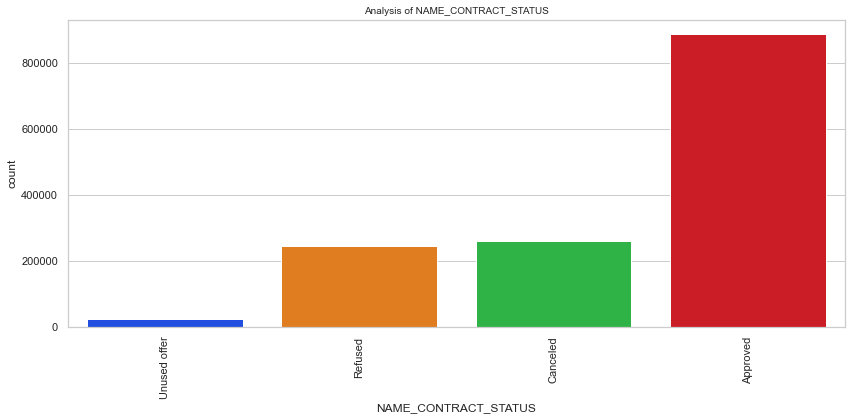

In [154]:
uni_countplot_merge('NAME_CONTRACT_STATUS')

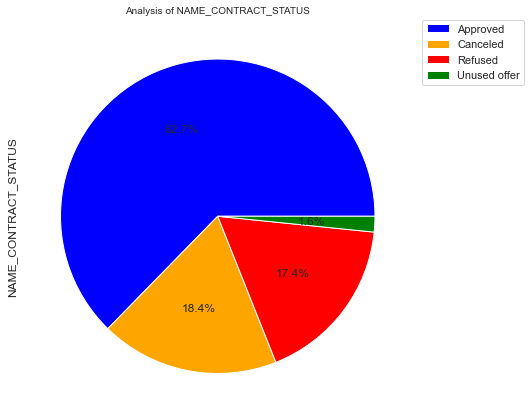

In [155]:
uni_pieplot_merge('NAME_CONTRACT_STATUS')

<font color='blue'/>**Analysis**:  Approved loan status is highest followed by Cancelled

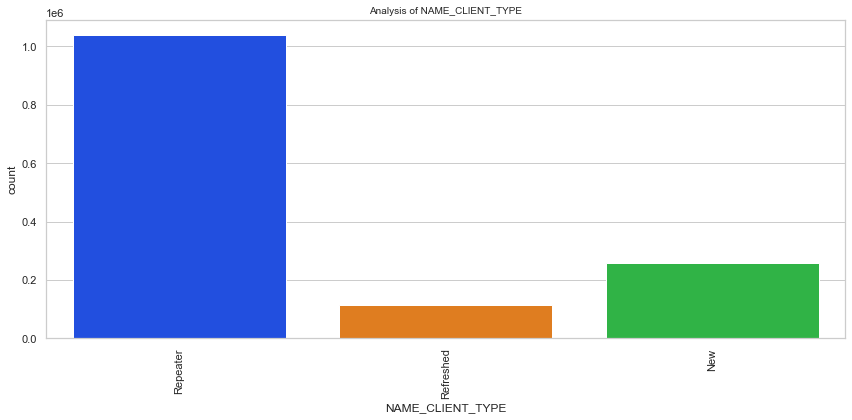

In [156]:
uni_countplot_merge('NAME_CLIENT_TYPE')

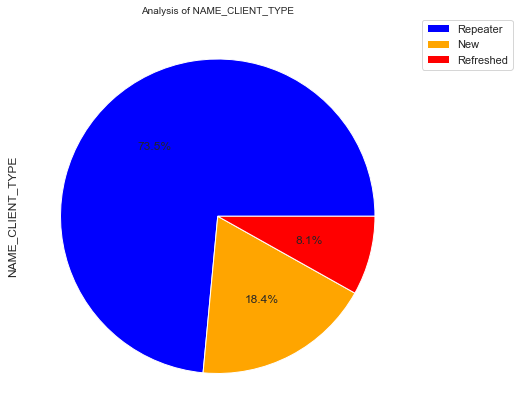

In [157]:
uni_pieplot_merge('NAME_CLIENT_TYPE')

<font color='blue'/>**Analysis**: Repeater applicants are highest followed by new applicants for loan application 

## Univariate Analysis 

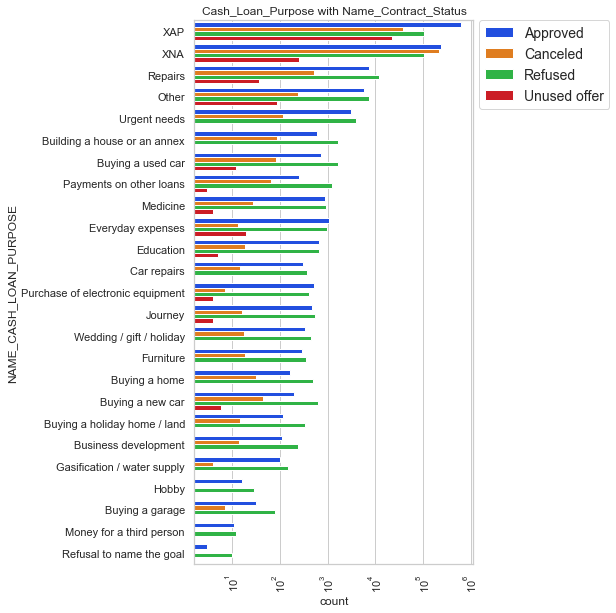

In [158]:
# Cash_Loan_Purpose with Name_Contract_Status using count plot 
sns.set_style('whitegrid')
plt.figure(figsize=(5,10))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Cash_Loan_Purpose with Name_Contract_Status')
ax = sns.countplot(data = appl_merge, y = 'NAME_CASH_LOAN_PURPOSE', 
                   order=appl_merge_tgt1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='bright')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize='14')
plt.show()

<font color='blue'/>**Analysis**: Most Refused loans are for 'Repairs'.
Refusal for buying a new car has higher rejection than approval

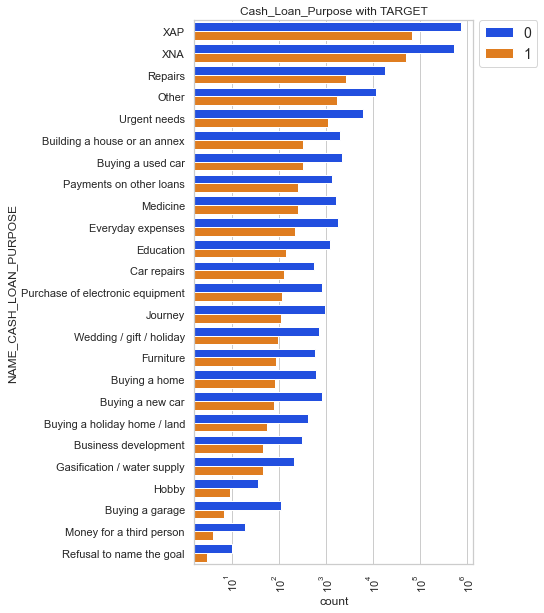

In [159]:
# Cash_Loan_Purpose with TARGET using count plot 
sns.set_style('whitegrid')
plt.figure(figsize=(5,10))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Cash_Loan_Purpose with TARGET')
ax = sns.countplot(data = appl_merge, y = 'NAME_CASH_LOAN_PURPOSE', 
                   order=appl_merge_tgt1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='bright')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='14')
plt.show()

<font color='blue'/>**Analysis**:Loan for buying garage has significanlty higher non-defualter compared to defaulter.
Defaulter percentage in repairs is high compared to others 

## Bivariate Ananlysis 

In [161]:
# function to automate bivariate analysis countplot
def bi_countplot_merge(column,hue_column):
    plt.figure(figsize = [12,7])
    palt = sns.color_palette("bright")

    sns.countplot(x = column, data = appl_merge, 
                  order = sorted(appl_merge[column].unique()), palette = palt,
                  hue = hue_column, hue_order = sorted(appl_merge[hue_column].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt. legend (title=hue_column, fontsize=' 10 ', title_fontsize=' 10 ')
    plt.tight_layout(pad = 4)
    plt.show()

In [162]:
# function to automate bivariate analysis boxplot
def bi_boxplot_merge(categorical,continuous,hue_column):
    plt.figure(figsize = [10,6])

    sns.boxplot(x = categorical, 
                y = appl_merge[continuous], data = appl_merge,order = sorted(appl_merge[categorical].unique(), reverse = True),
                hue = hue_column, hue_order = sorted(appl_merge[hue_column].unique(), reverse = True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize='10')
    plt.tight_layout()
    plt.show()

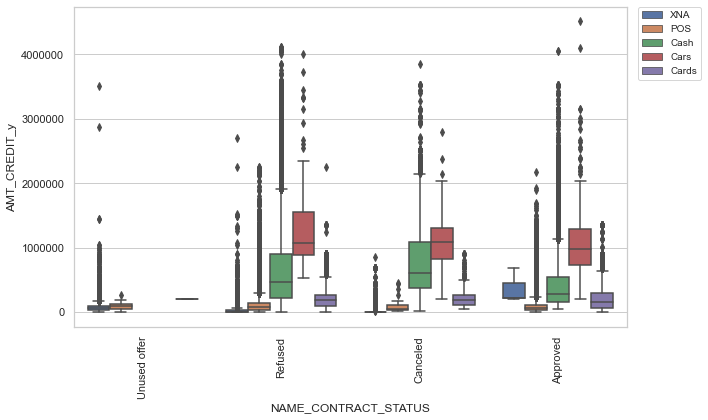

In [163]:
bi_boxplot_merge('NAME_CONTRACT_STATUS','AMT_CREDIT_y','NAME_PORTFOLIO')

<font color='blue'/>**Analysis**:Applicants who are Refused, Approved receive more median credit in car portfolio

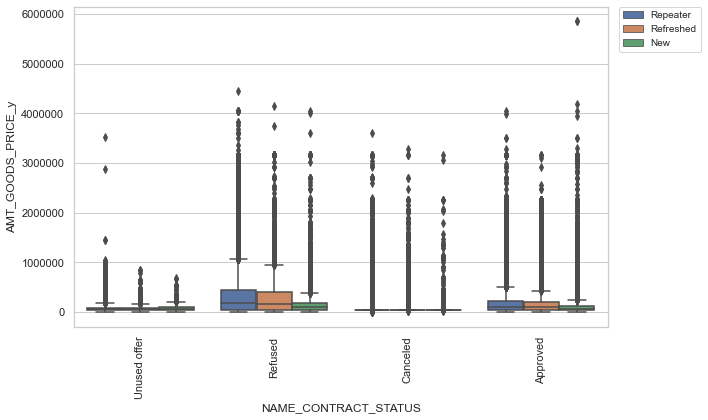

In [164]:
bi_boxplot_merge('NAME_CONTRACT_STATUS','AMT_GOODS_PRICE_y','NAME_CLIENT_TYPE')

<font color='blue'/>**Analysis**: Applicants  who are Repeater and Refused has better median goods price compared to others

### Categorical vs. Categorical variables

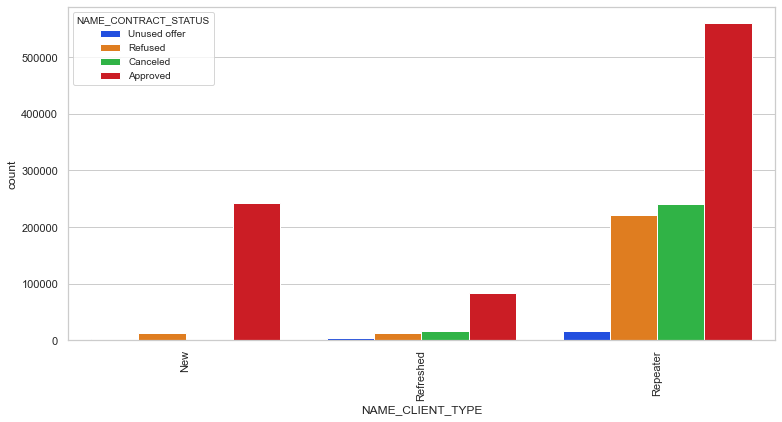

In [165]:
bi_countplot_merge('NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS')

<font color='blue'/>**Analysis**:Repeat applicants receive the most approvals followed by New

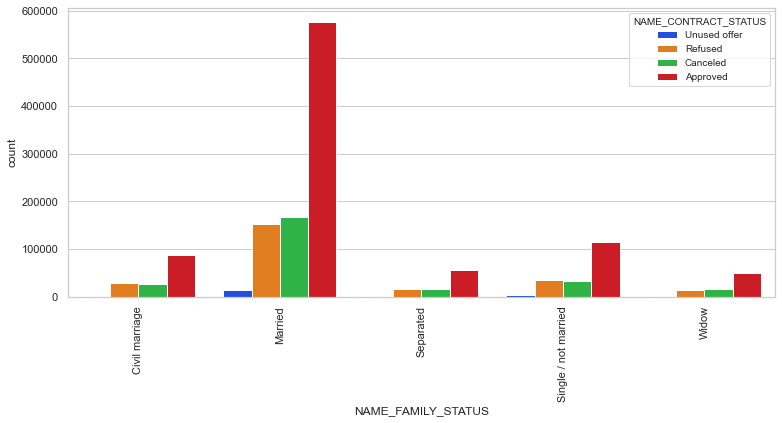

In [166]:
bi_countplot_merge('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

<font color='blue'/>**Analysis**:Married applicants receive the most approvals

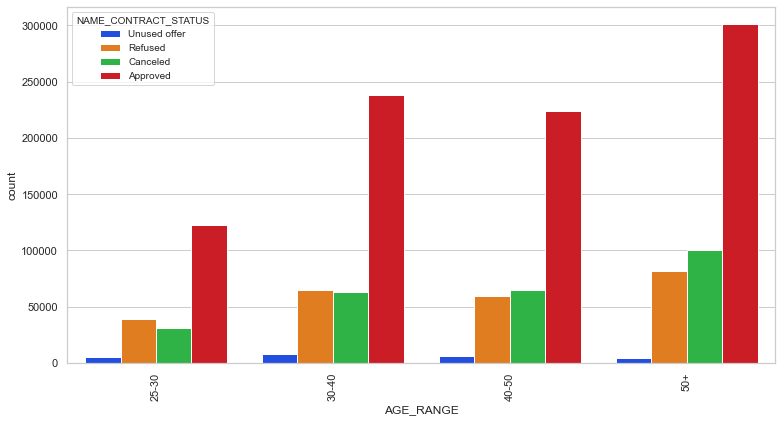

In [167]:
bi_countplot_merge('AGE_RANGE','NAME_CONTRACT_STATUS')

<font color='blue'/>**Analysis**:Applicants in the age group 50+ receive less refusals 

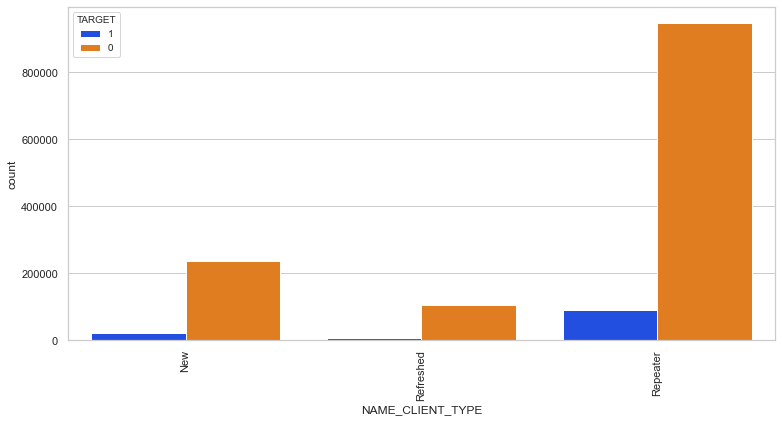

In [169]:
bi_countplot_merge('NAME_CLIENT_TYPE','TARGET')

<font color='blue'/>**Analysis**:Repeater applicants are less likely to default 

## **Insights**
### How to increase the probability of selecting applicants capable of repaying the loan

`1] CODE_GENDER `<br><br>
 Defaulter Applicant <br>
a. Male have higher probabilty of defaulting <br>
b. Particularly avoid unemployed males <br>
c. Male with Secondary/ Secondary special education are more likely to default <br><br>
 Non-Defaulter Applicant <br>
a. Male with Academic degree has higher probability of non default  <br>
b. Female with Higher education are more likely to not default  <br><br>
`2] NAME_FAMILY_STATUS  `<br><br>
 Defaulter Applicant <br>
a. Applicant living with Parents and rented apartments have high probability of default  <br>
b. Single/not Married are more likely to default <br><br>
 Non-Defaulter Applicant <br>
a. People living in Office apartment has lower probability of default  <br>
b. Married/ Widow are comparatively non-defaulter <br><br>
`3] NAME_EDUCATION_TYPE  `<br><br>
 Defaulter Applicant <br>
a. Lower secondary higher chance of default (particulary if they are Married/ Widow)  <br><br>
 Non-Defaulter Applicant <br>
a. Applicants with Higher education are likely non-defaulter (particularly married)  <br><br>
`4] NAME_INCOME_TYPE  `<br><br>
 Non-Defaulter Applicant <br>
a. Pensioner are less likely to default  <br><br>
`5] REGION_RATING_CLIENT  `<br><br>
 Defaulter Applicant <br>
a. Region 3 applicants have high default rate  <br><br>
 Non-Defaulter Applicant <br>
a. Region 1 has lowe probability of default  <br><br>
`6] OCCUPATION_TYPE `<br><br>
 Defaulter Applicant <br>
a. Labourer are high on default (particularly Single(not married) & married)<br><br>
 Non-Defaulter Applicant <br>
a. Accoutants(Married) have high probability of non-defaulter  <br><br>
`7] AGE_RANGE`<br><br>
 Defaulter Applicant <br>
a. Applicants from 25-40 age group are likely to default<br><br>
 Non-Defaulter Applicant <br>
a. Applicants with age 50 years and above are less likely to default  <br><br>
`8] YEARS_EMPLOYMENT_RANGE`<br><br>
 Defaulter Applicant <br>
a. Applicants with 0-5 years of employment have high probability of default <br><br>
 Non-Defaulter Applicant <br>
a. Applicants with 30years and above years of employment are less likely to default  <br><br>
`9] AMT_INCOME_RANGE`<br><br>
 Defaulter Applicant <br>
a. Applicants with income less than 300,000 have high probability of default <br><br>
 Non-Defaulter Applicant <br>
a. Applicants with more than 700,000 of income are less likely to default  <br><br>
`10] AMT_CREDIT`<br><br>
 Defaulter Applicant <br>
a. Applicants with AMT_CREDIT between 2.5 & 6.5 lakhs are likely to default <br><br>
 Non-Defaulter Applicant <br>
a. Applicants with AMT_CREDIT greater than 7 lakhs are less likely to default  <br><br>
`11] AMT_GOODs_PRICE`<br><br>
 Defaulter Applicant <br>
a. Applicants with AMT_GOODs_PRICE between ~2.5 & ~5.5 have more default rate <br><br>
`12] CNT_CHILDREN`<br><br>
 Non-Defaulter Applicant <br>
a. Applicants with no child , have low default rate  <br><br>
`13] ORGANISATION_TYPE`<br><br>
 Defaulter Applicant <br>
a. Self employed and donot own a car have high defaulting probability<br><br>
`14] CASH_LOAN_PURPOSE`<br><br>
 Defaulter Applicant <br>
a. Loan default percentage for Repairs is high <br><br>
 Non-Defaulter Applicant <br>
a. Loan applicant for buying a Garage is less likely to default  <br><br>
`15] Repeater applicants are less likely to default`<br><br>
`16] Refusal of loan for New Car and Repairs are high. Bank can increase the rate of interest to increase Approval of the same  `<br><br>
